In [ ]:
!pip install tifffile

In [ ]:
import os
import numpy as np
from tifffile import imread, imwrite
from scipy.ndimage import label, sum, binary_closing
from skimage.morphology import disk
import matplotlib.pyplot as plt

covington-Unet-resnet50_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


<ipython-input-3-531c44f04251>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary = np.array(image > 0, dtype=np.int)


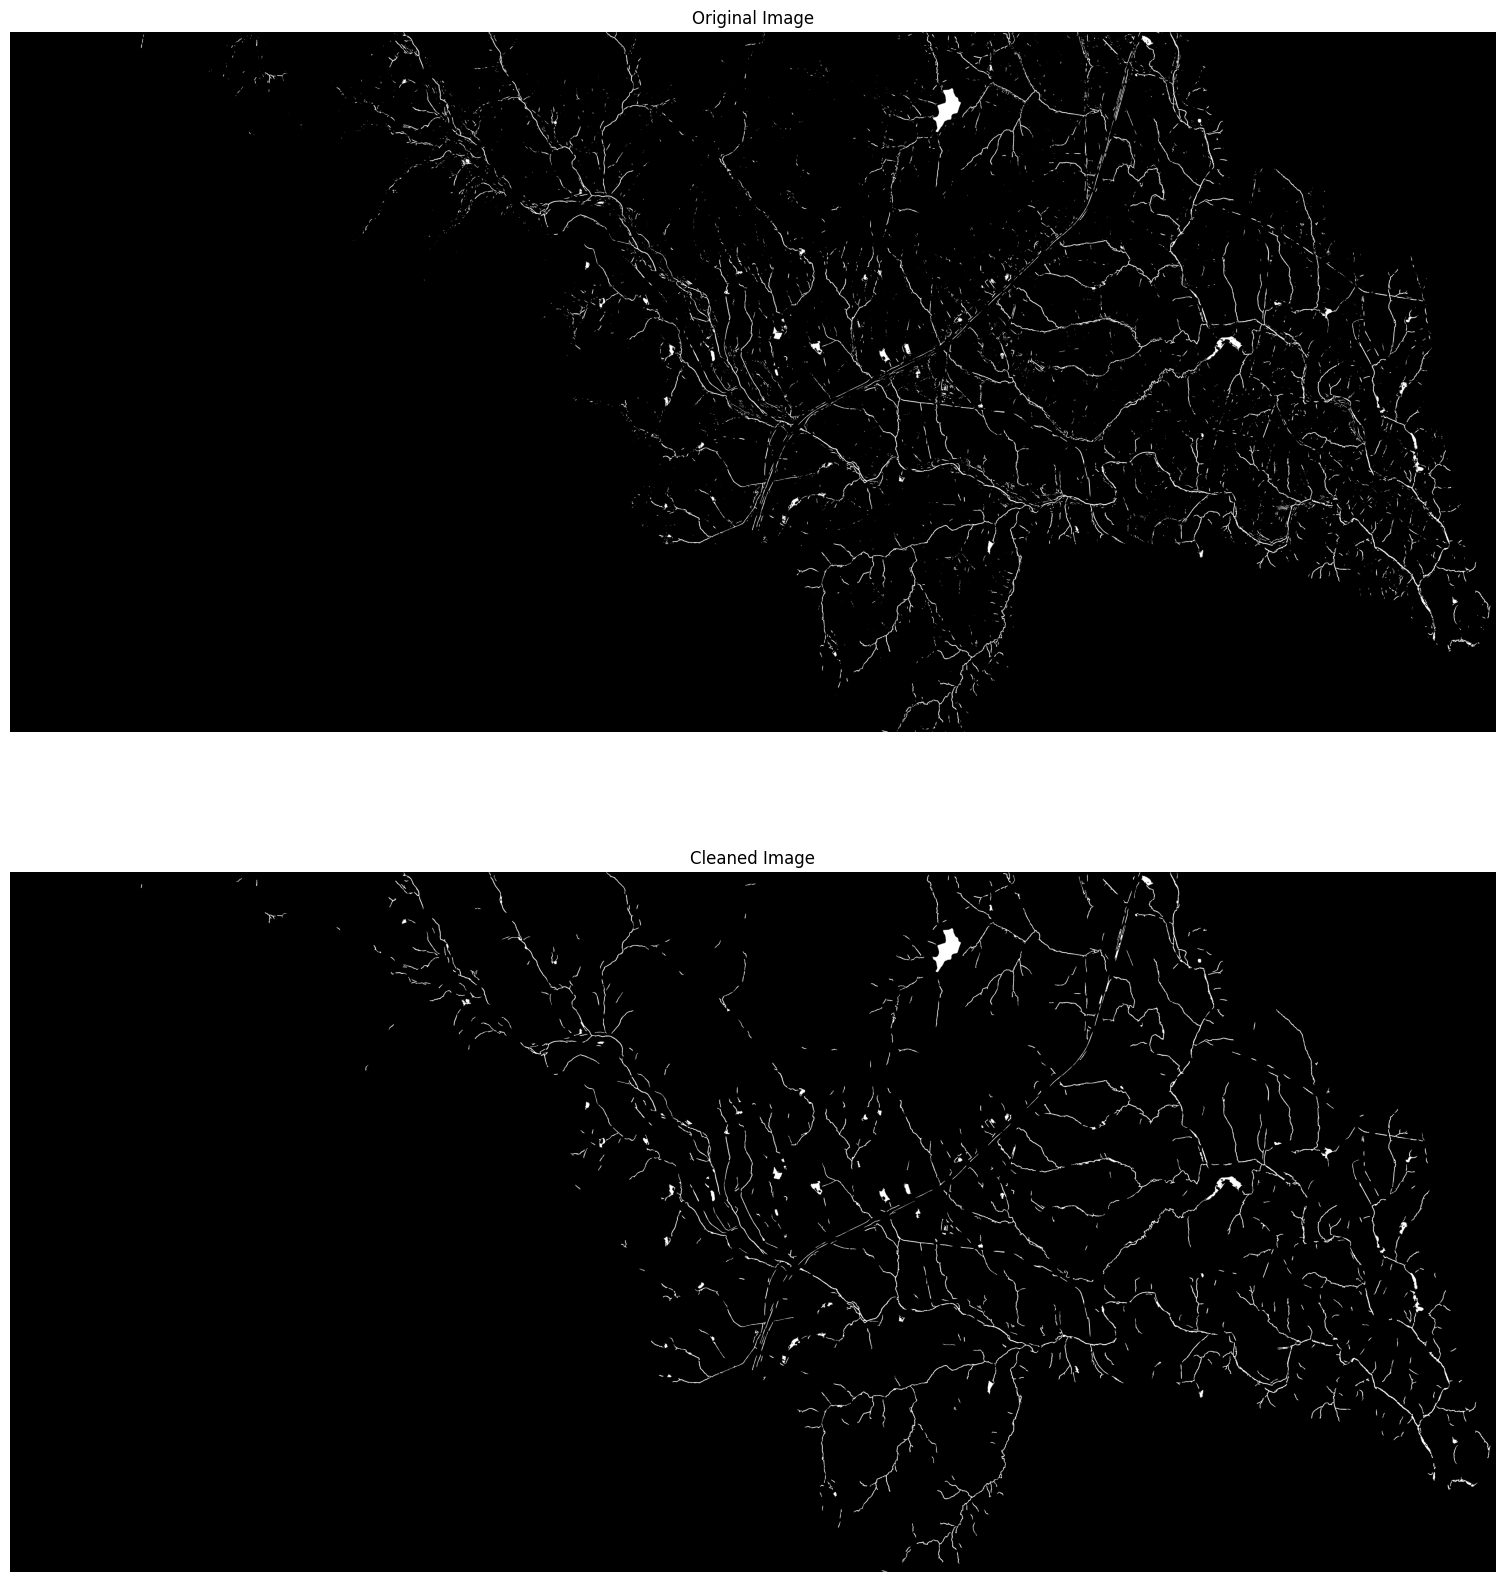

covington-Unet-attentionUnet_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


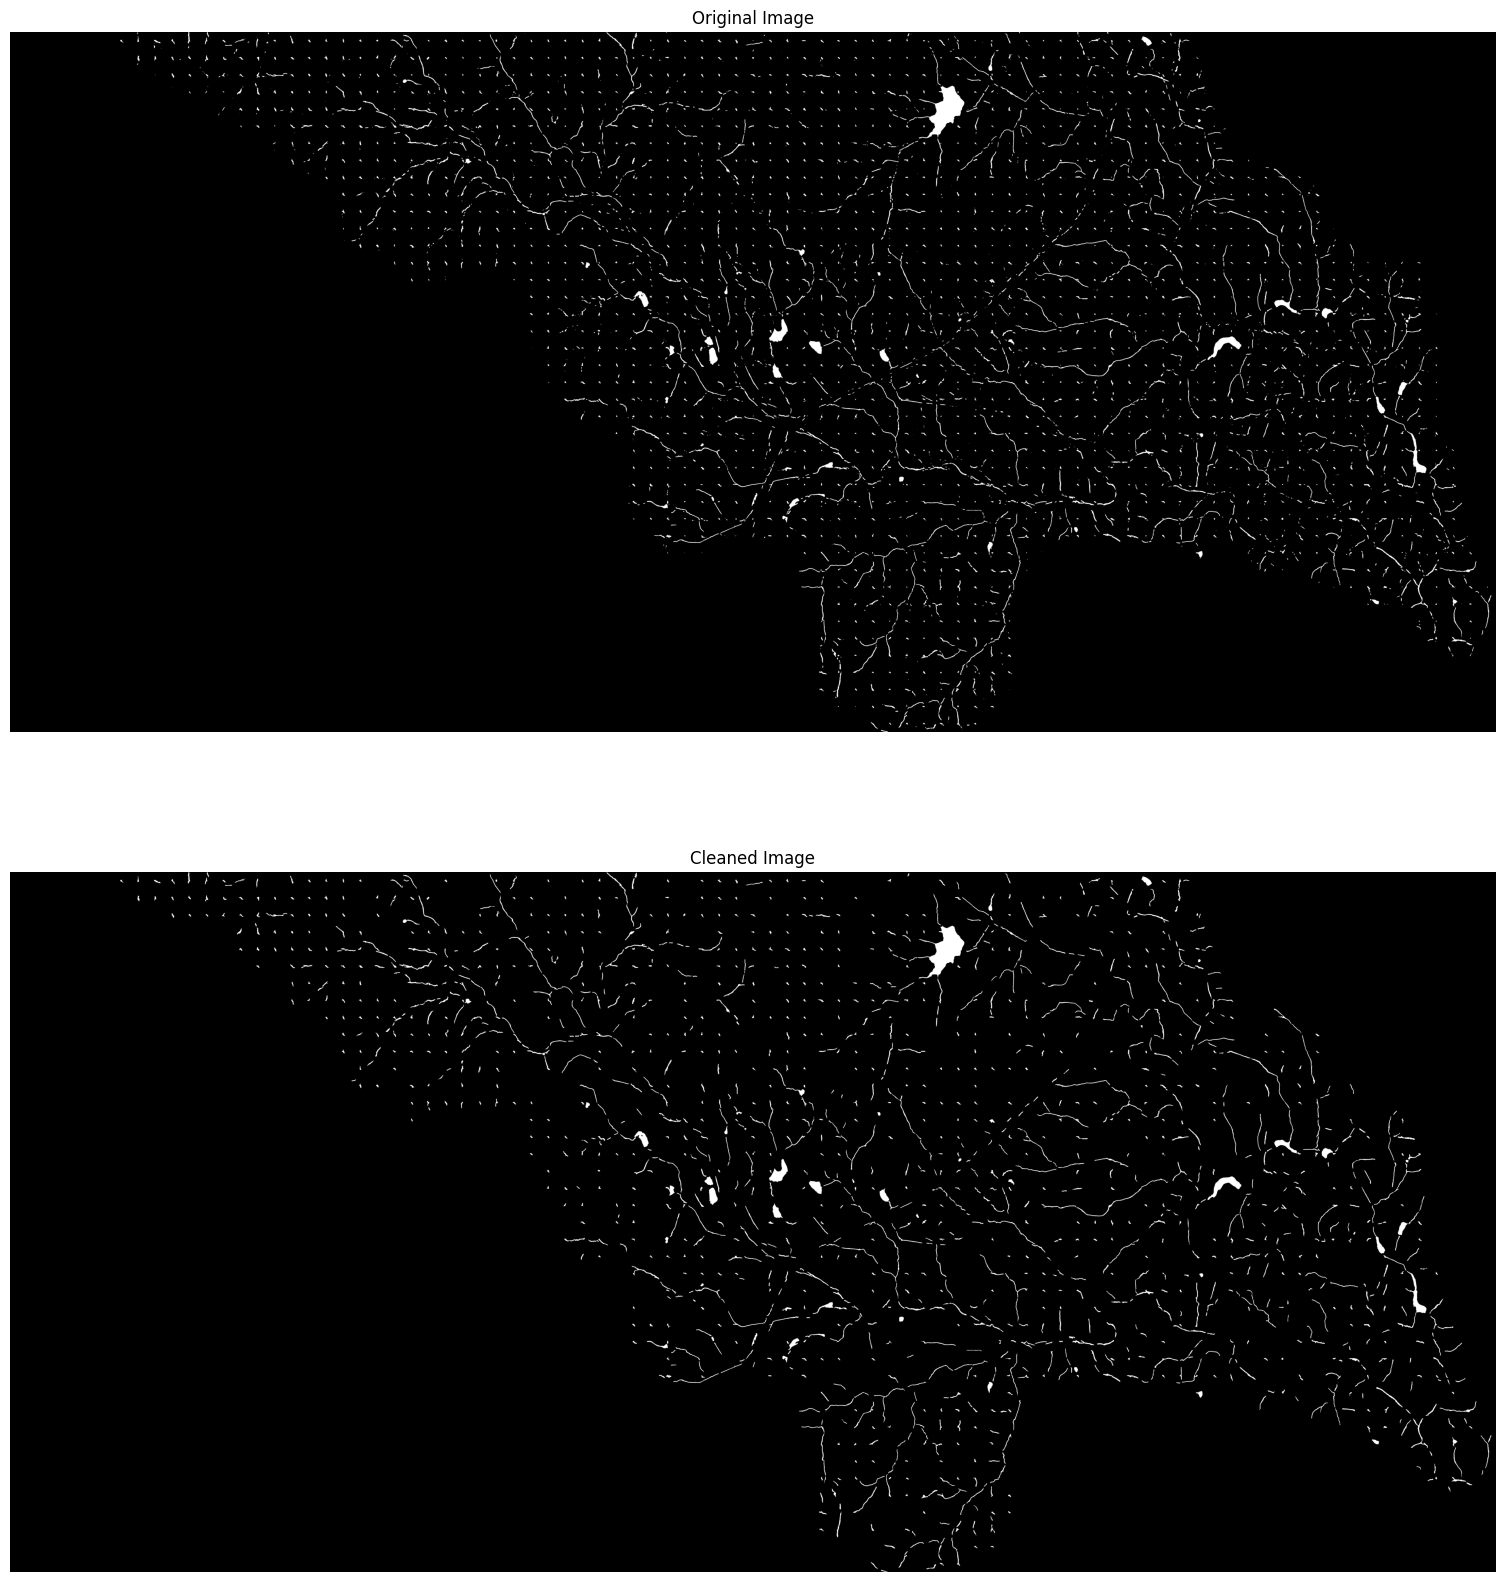

covington-Unet-densenet121_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


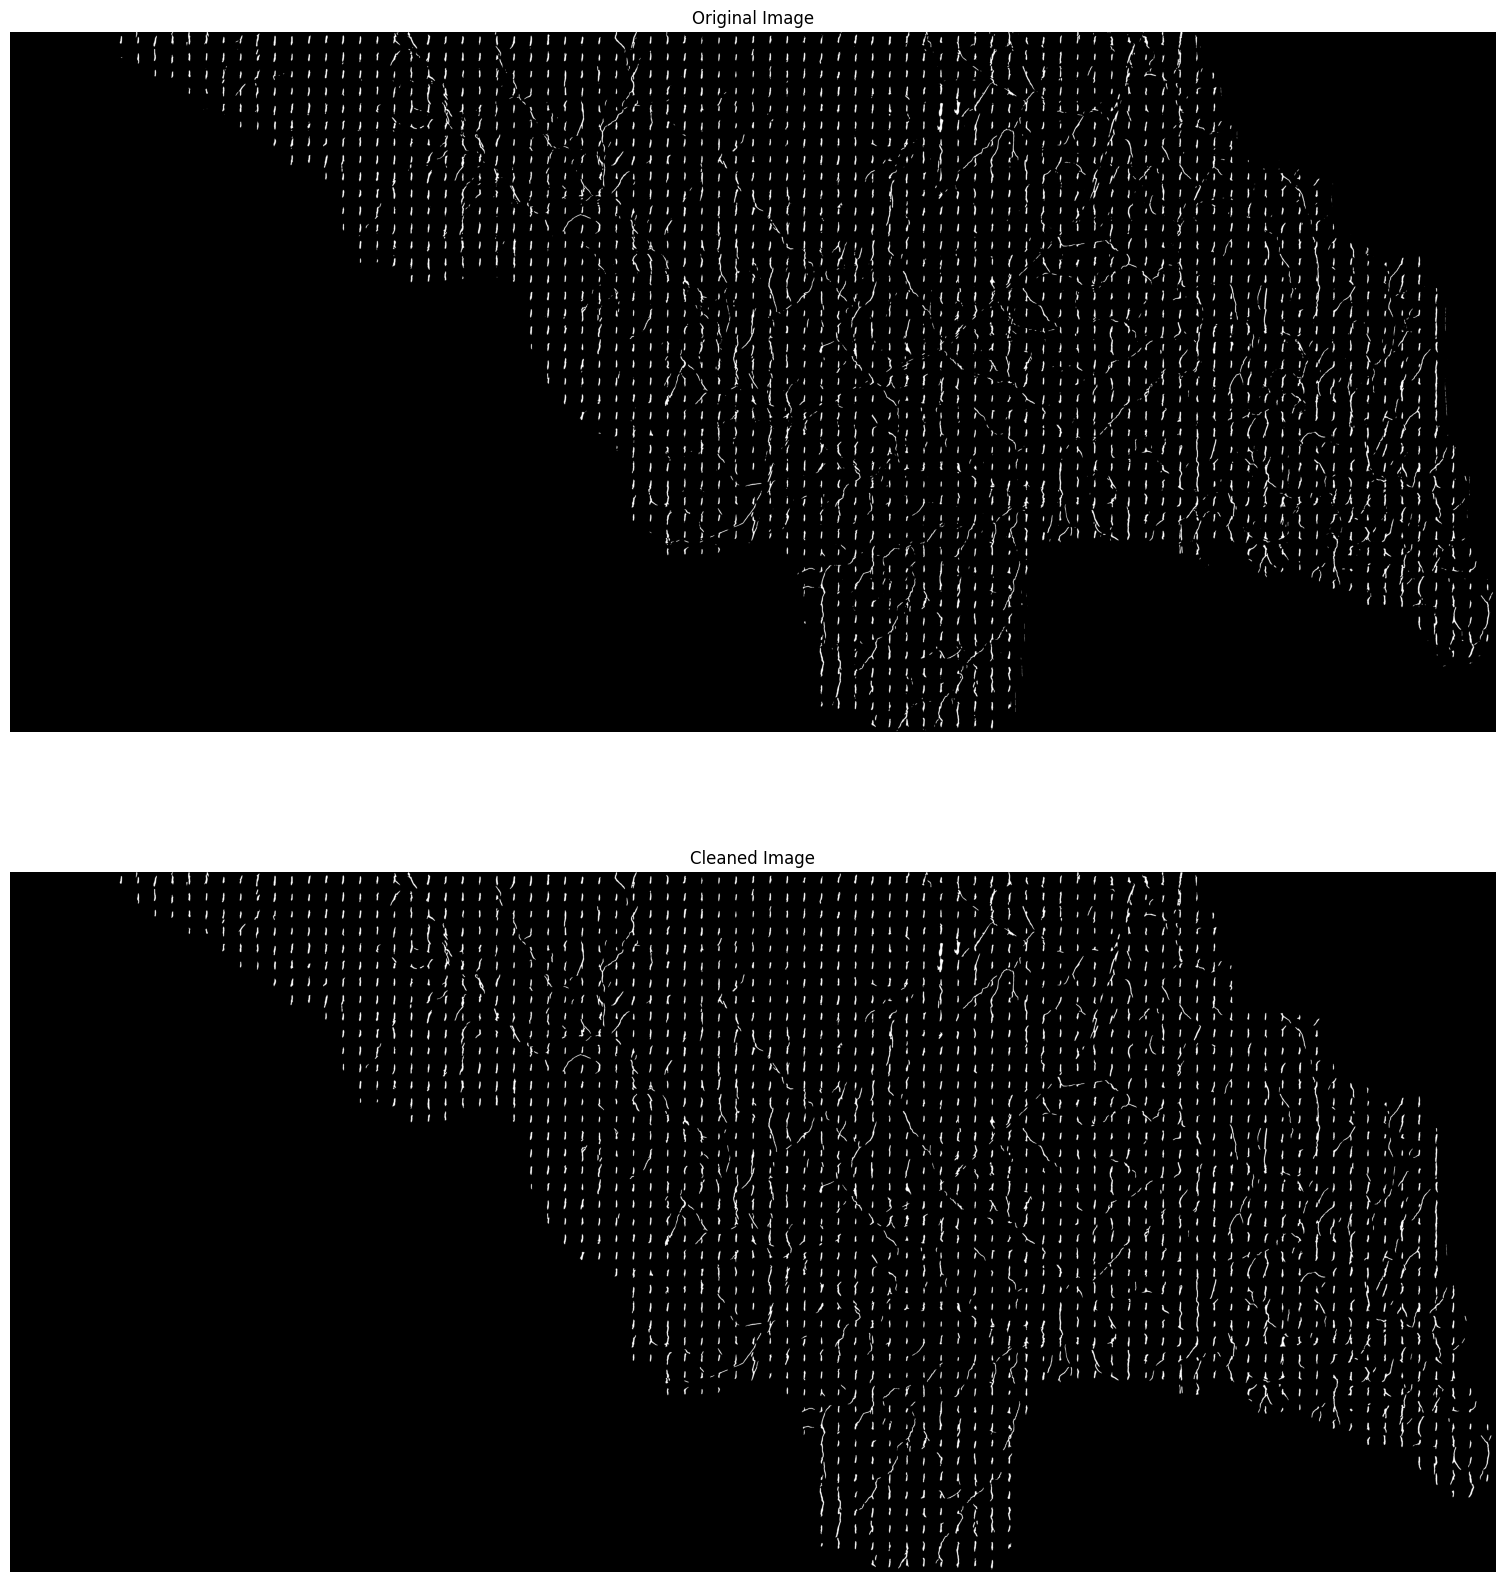

covington-Unet-densenet169_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


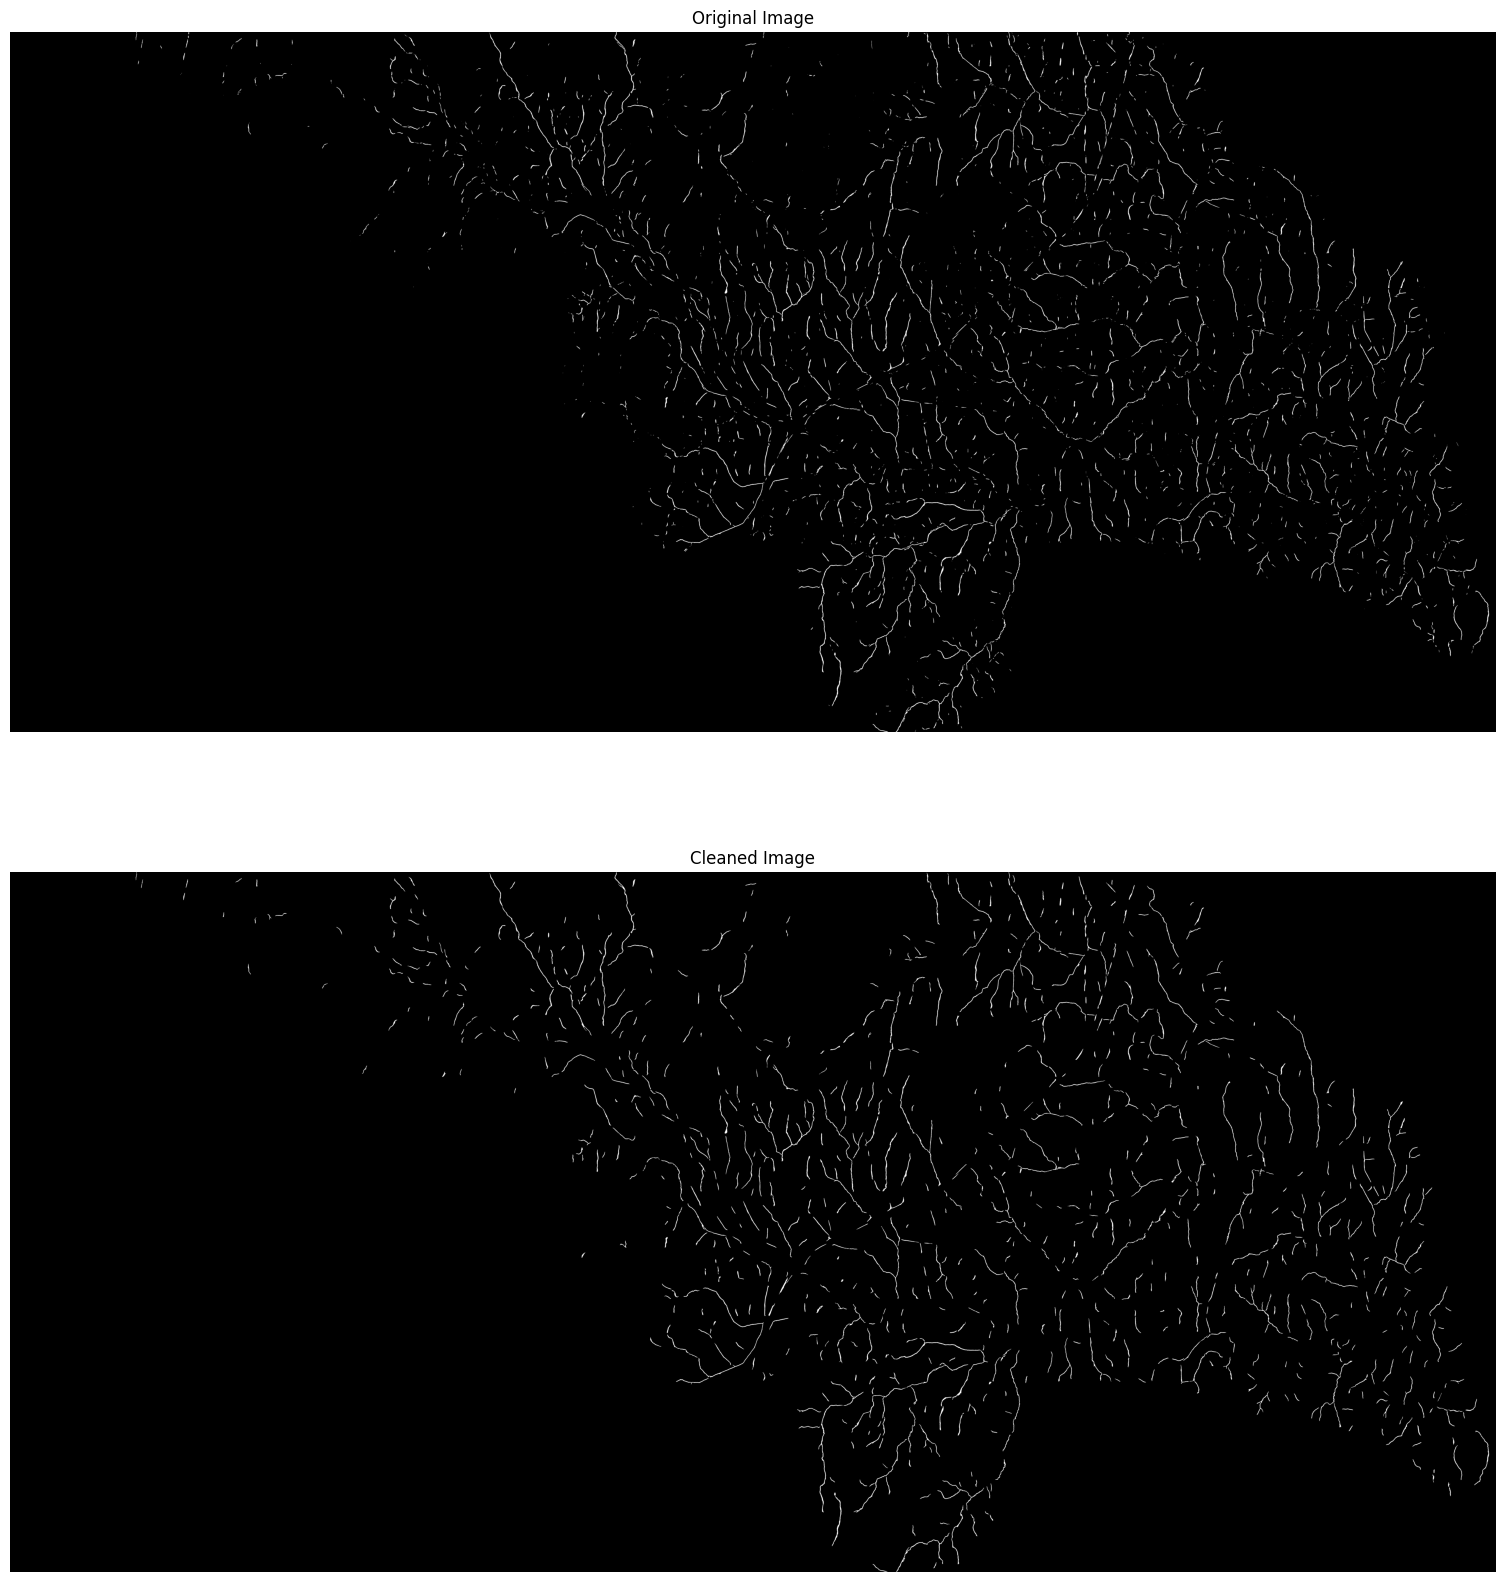

covington-Unet-resnet50-tf_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


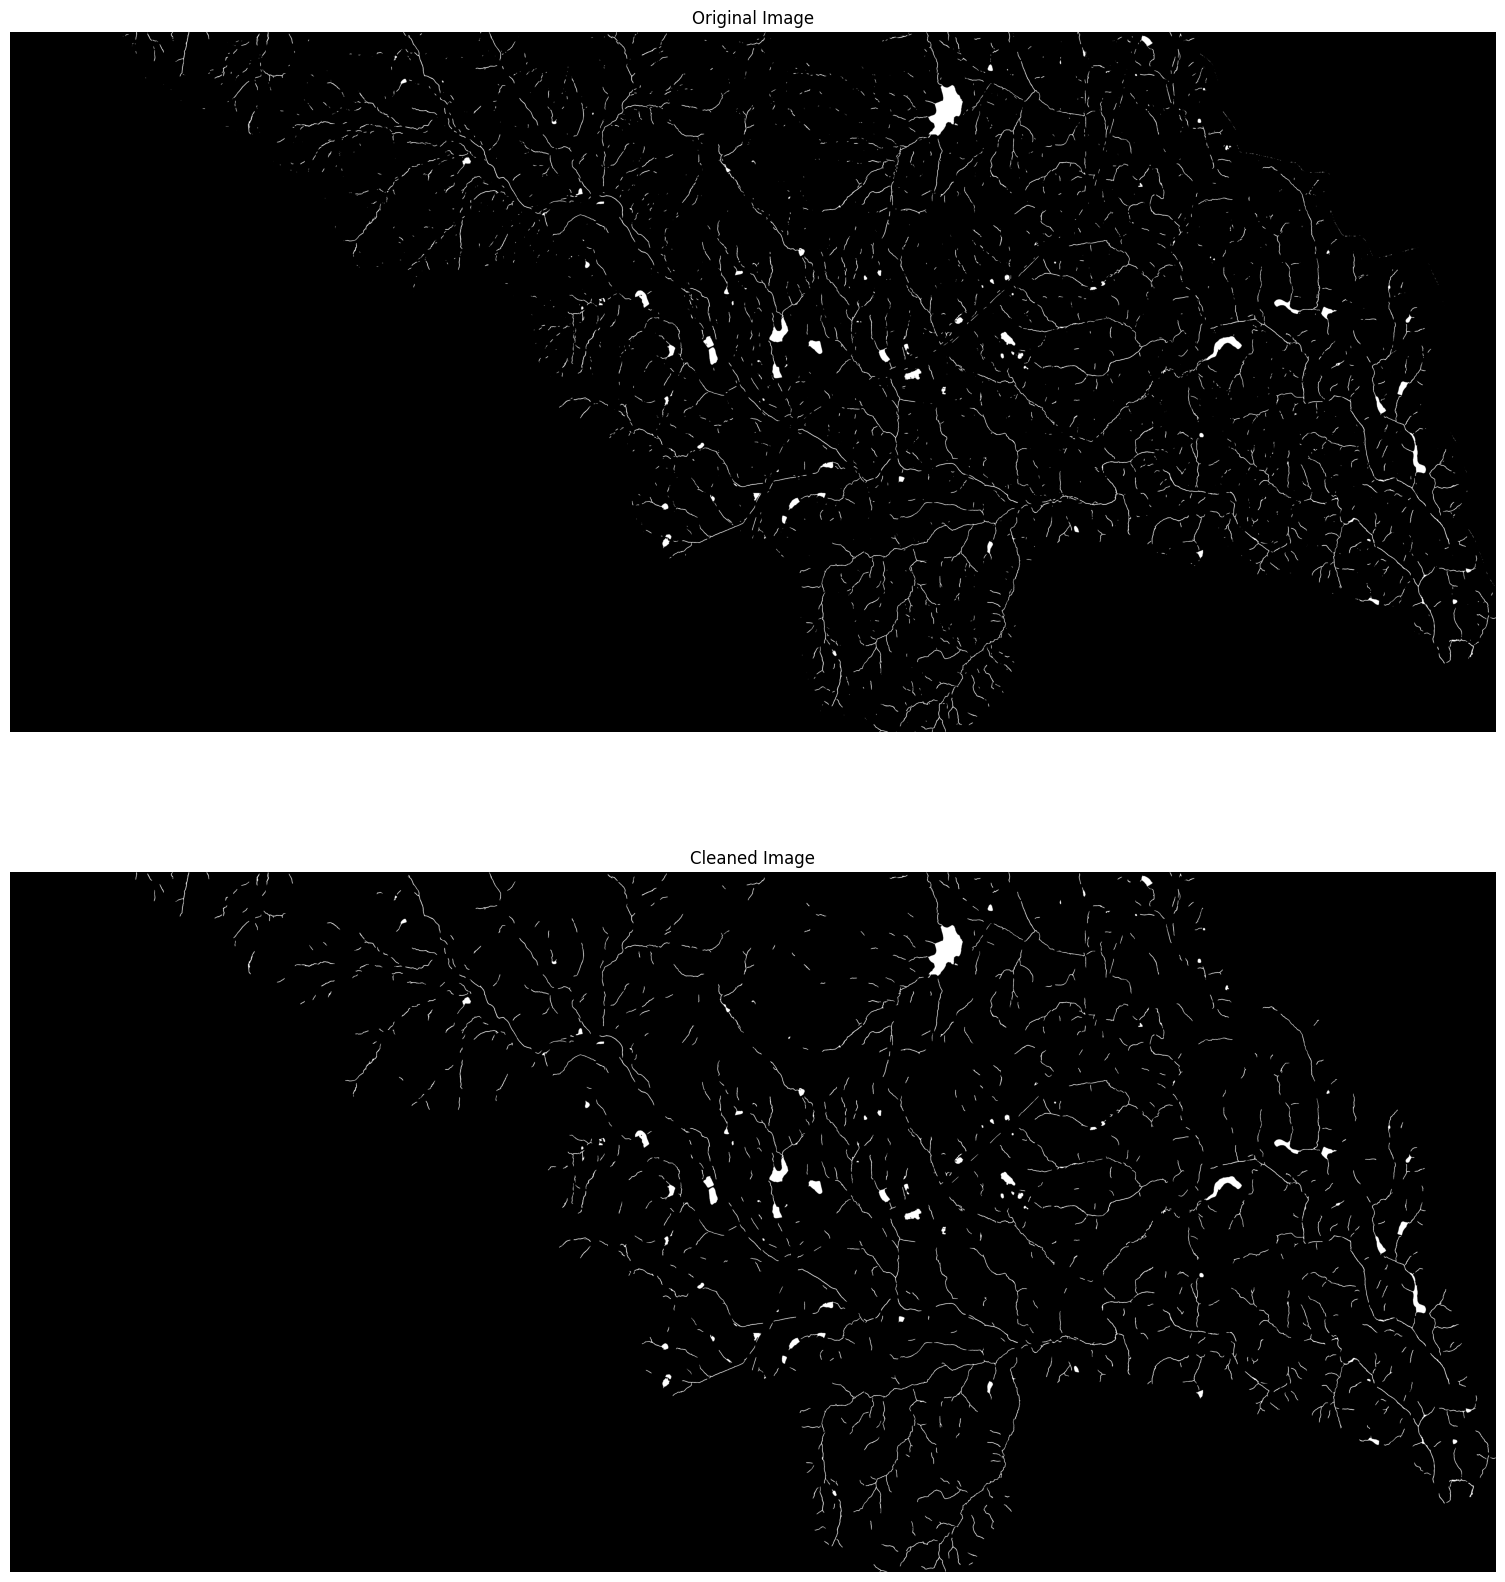

covington-Unet-attentionUnet-tf_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


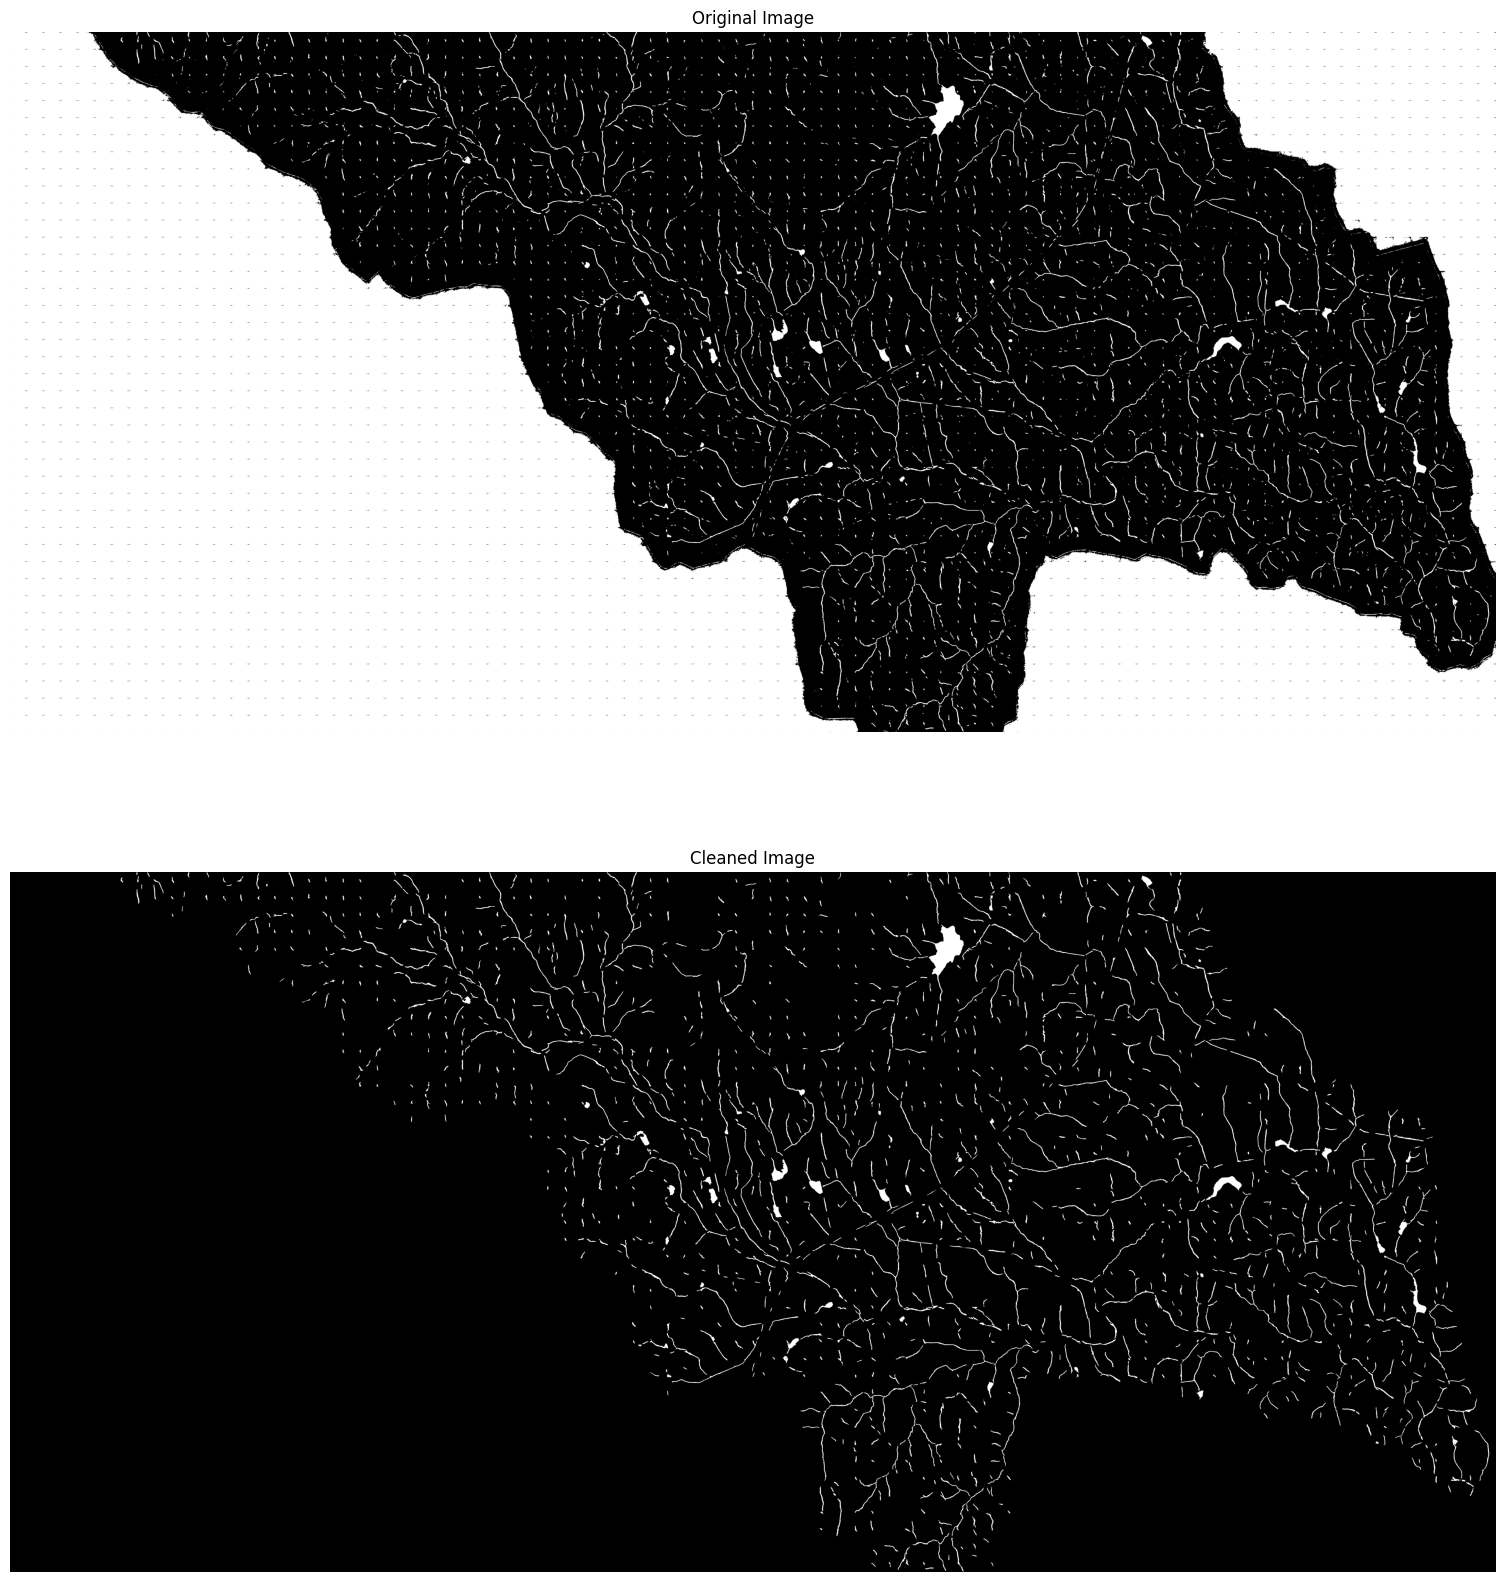

covington-Unet-densenet121-tf_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


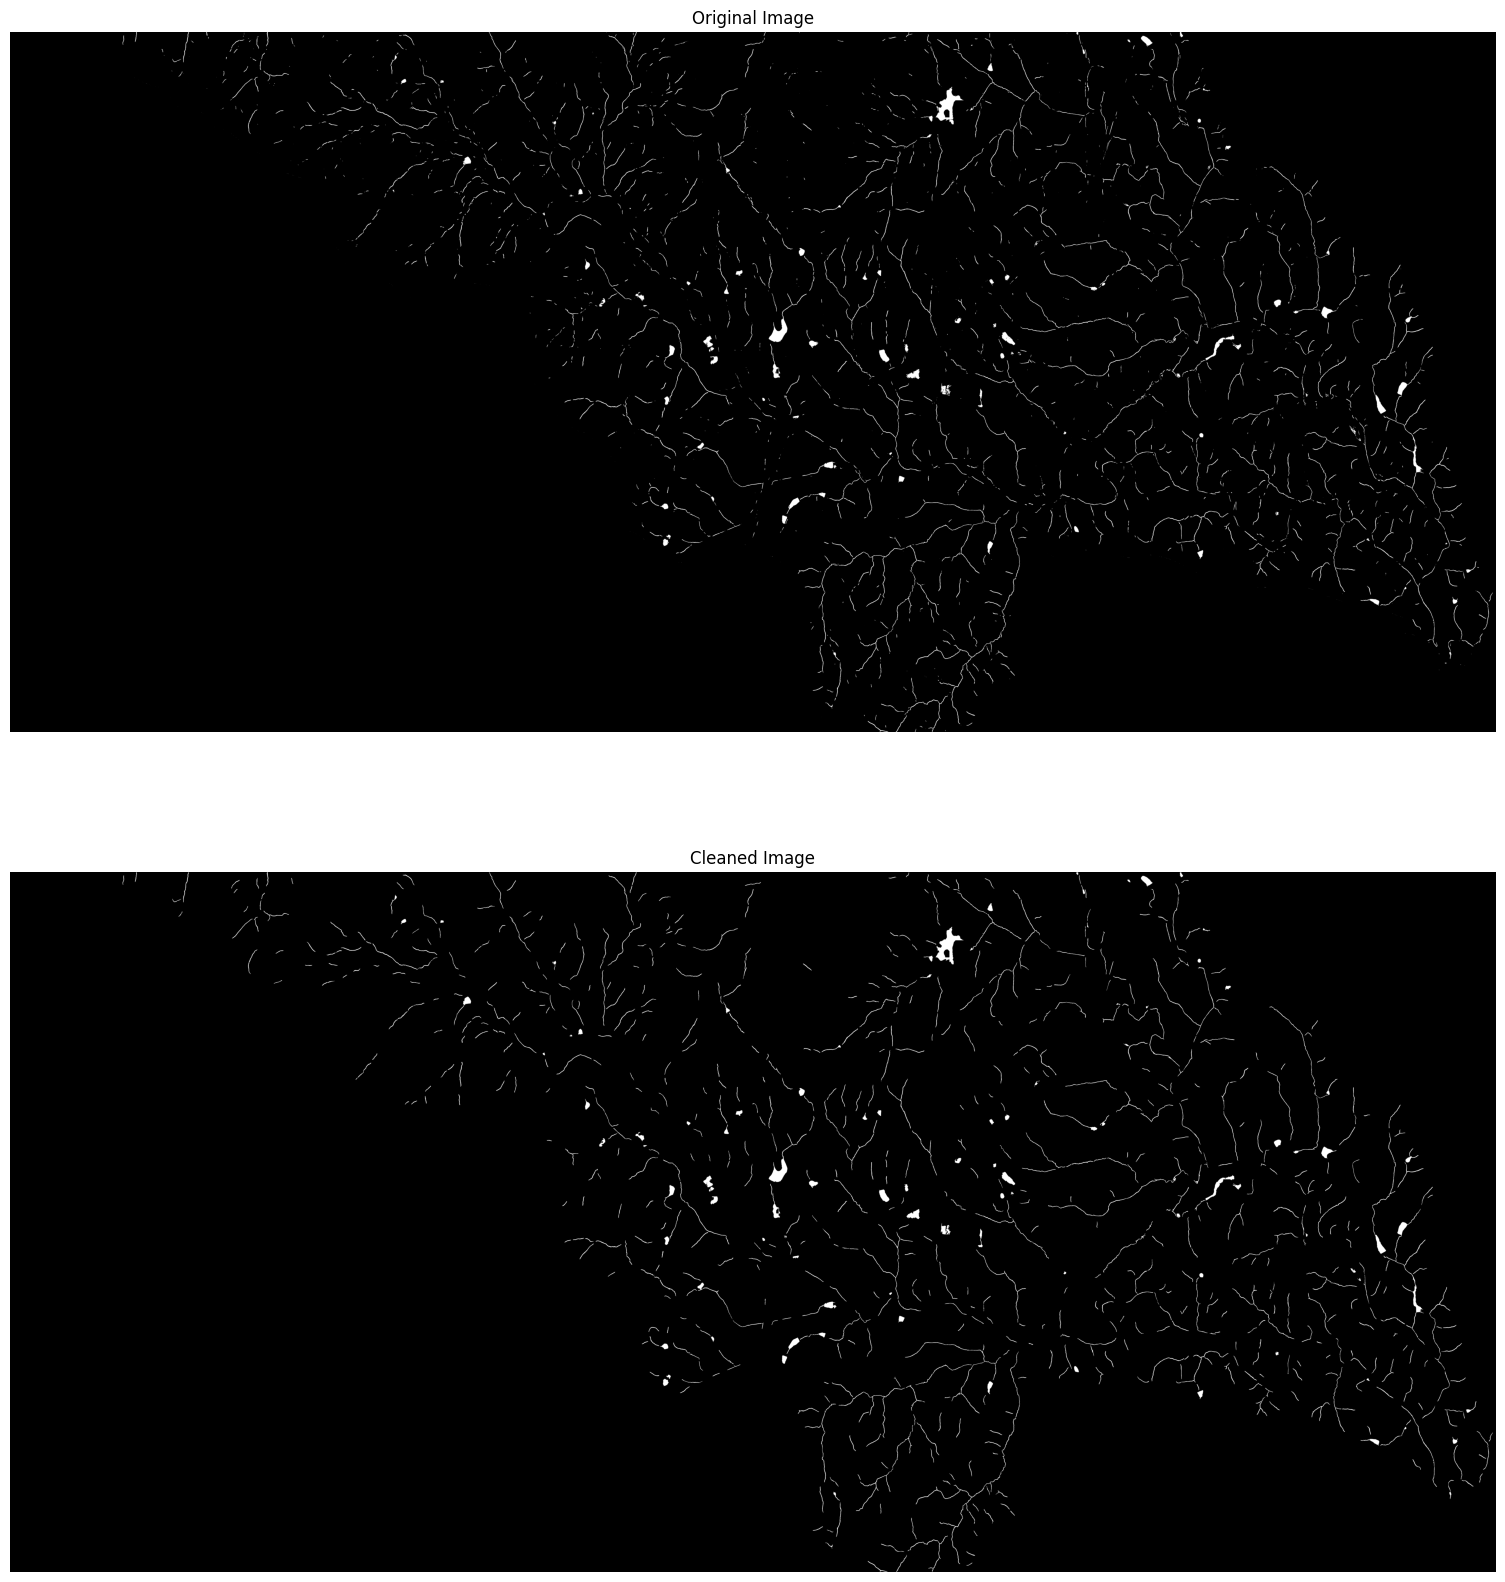

covington-Unet-densenet169-tf_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


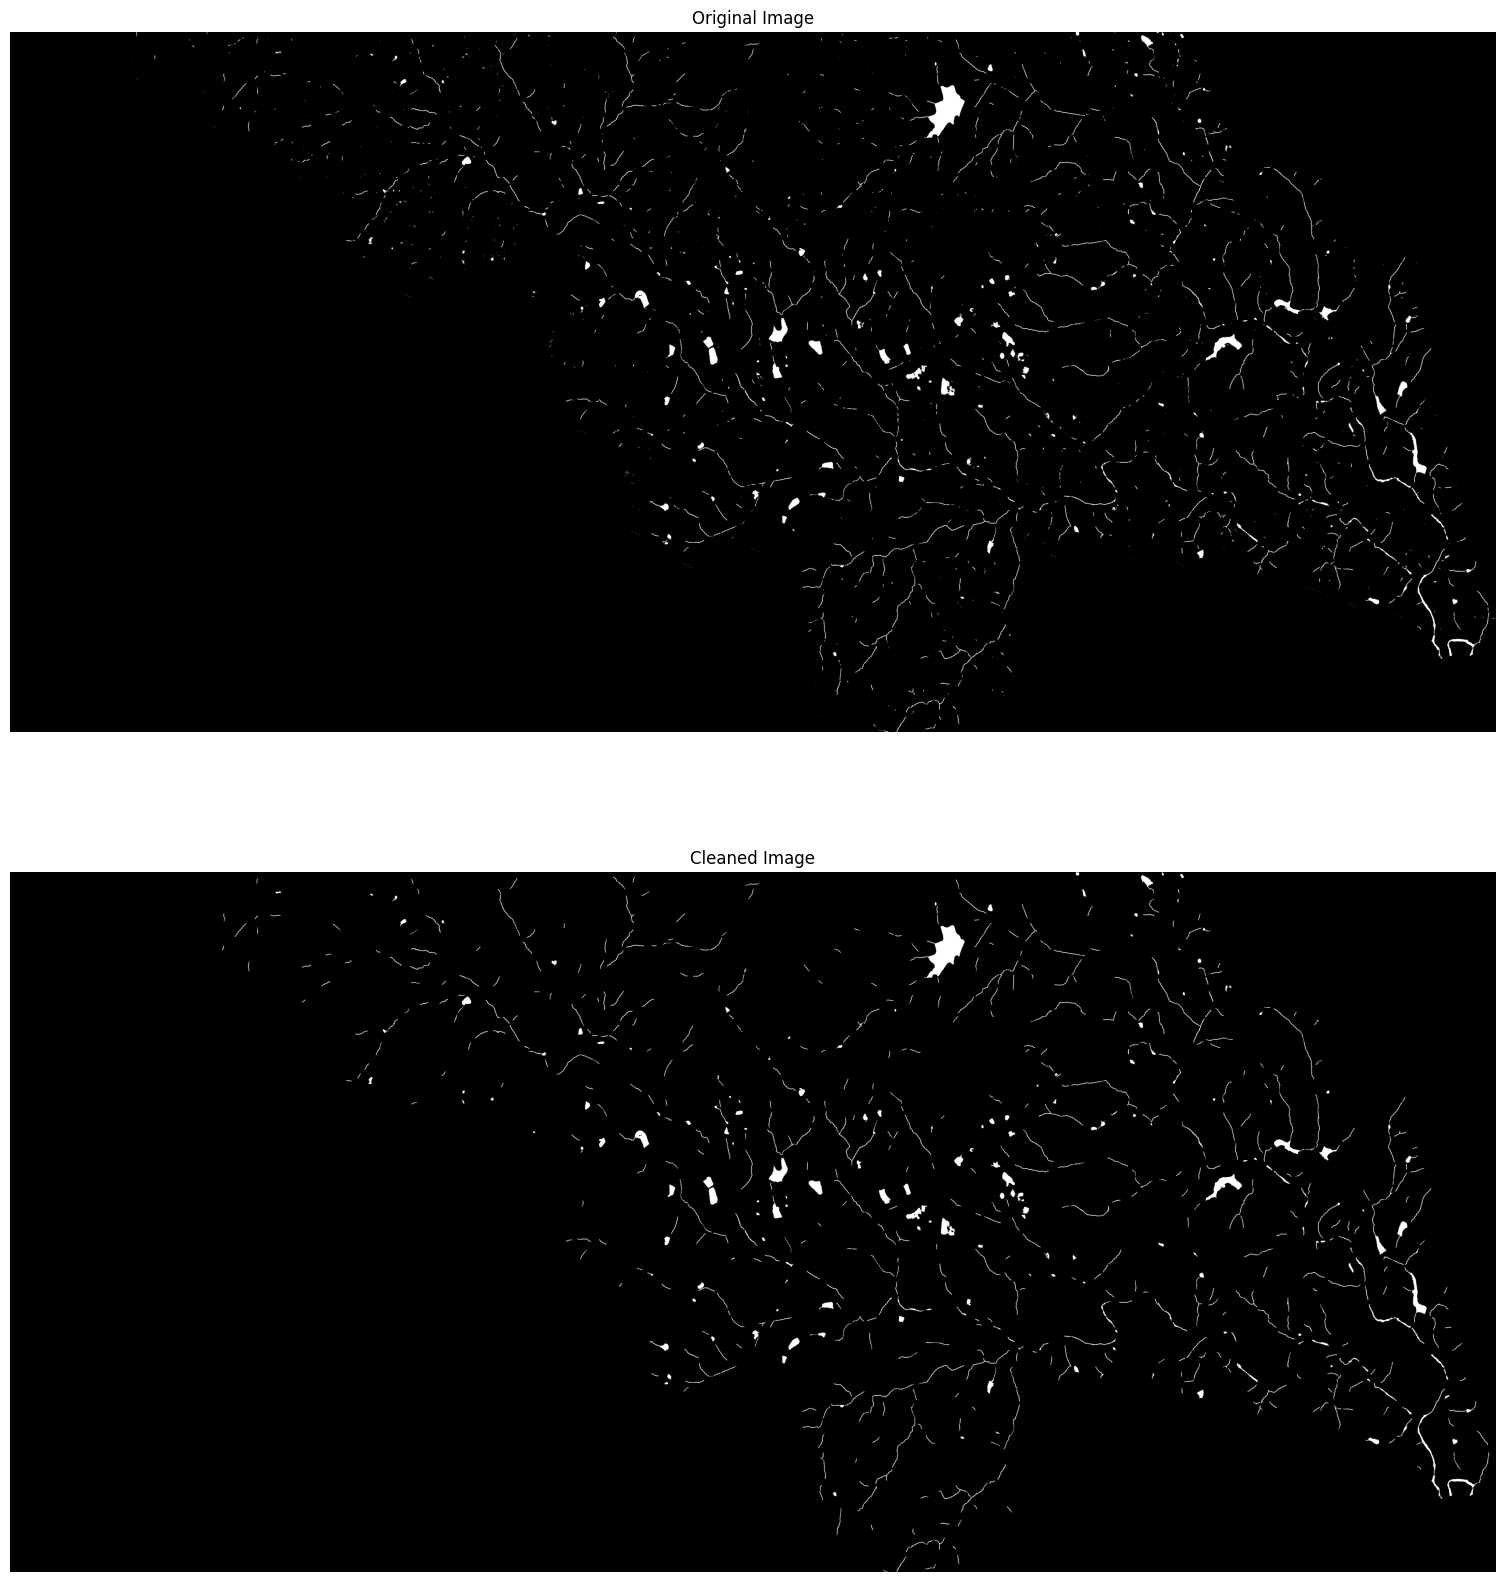

rowancreek-to-covington-Unet-resnet50-ImgN_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


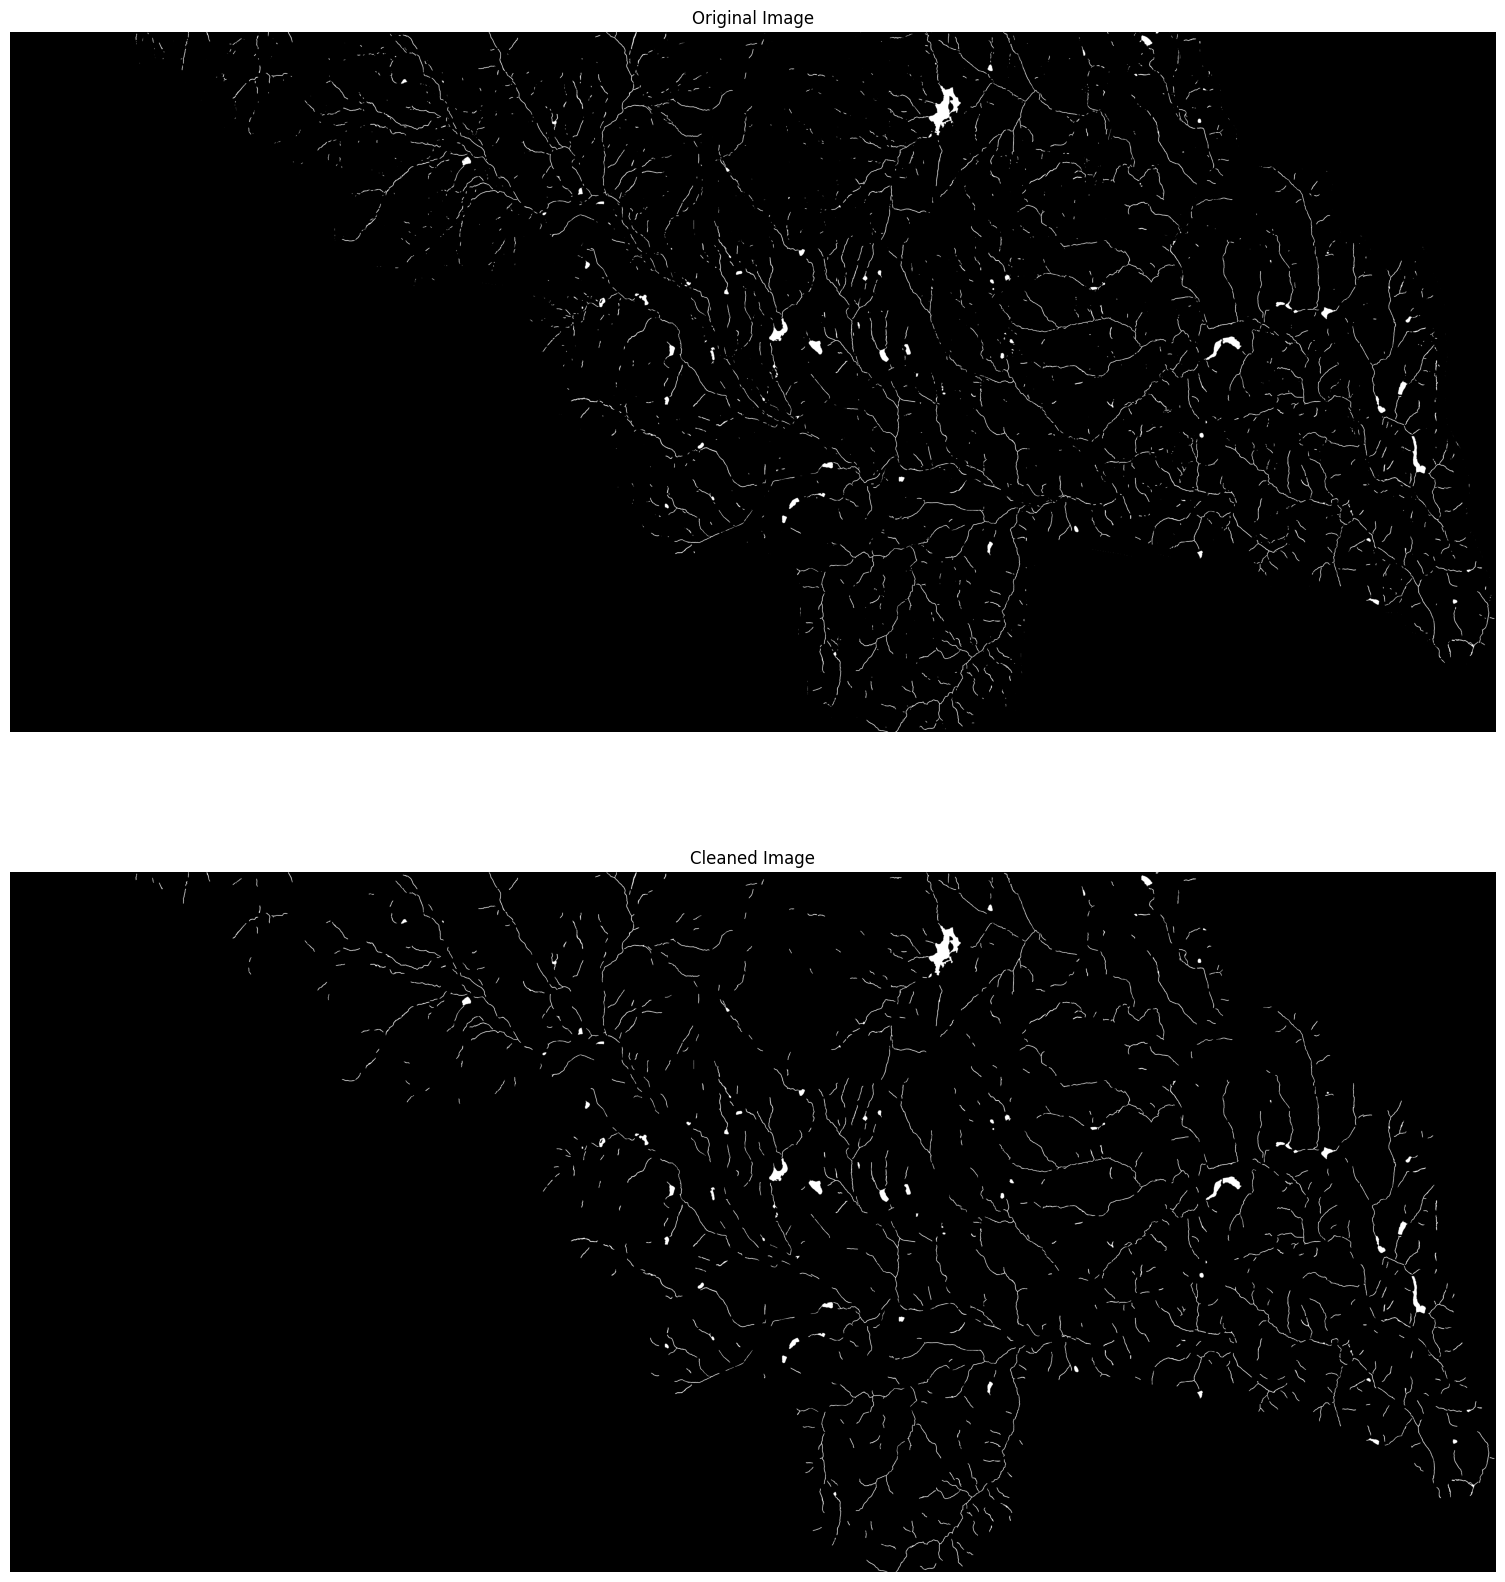

rowancreek-to-covington-Unet-attentionUnet-ImgN_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


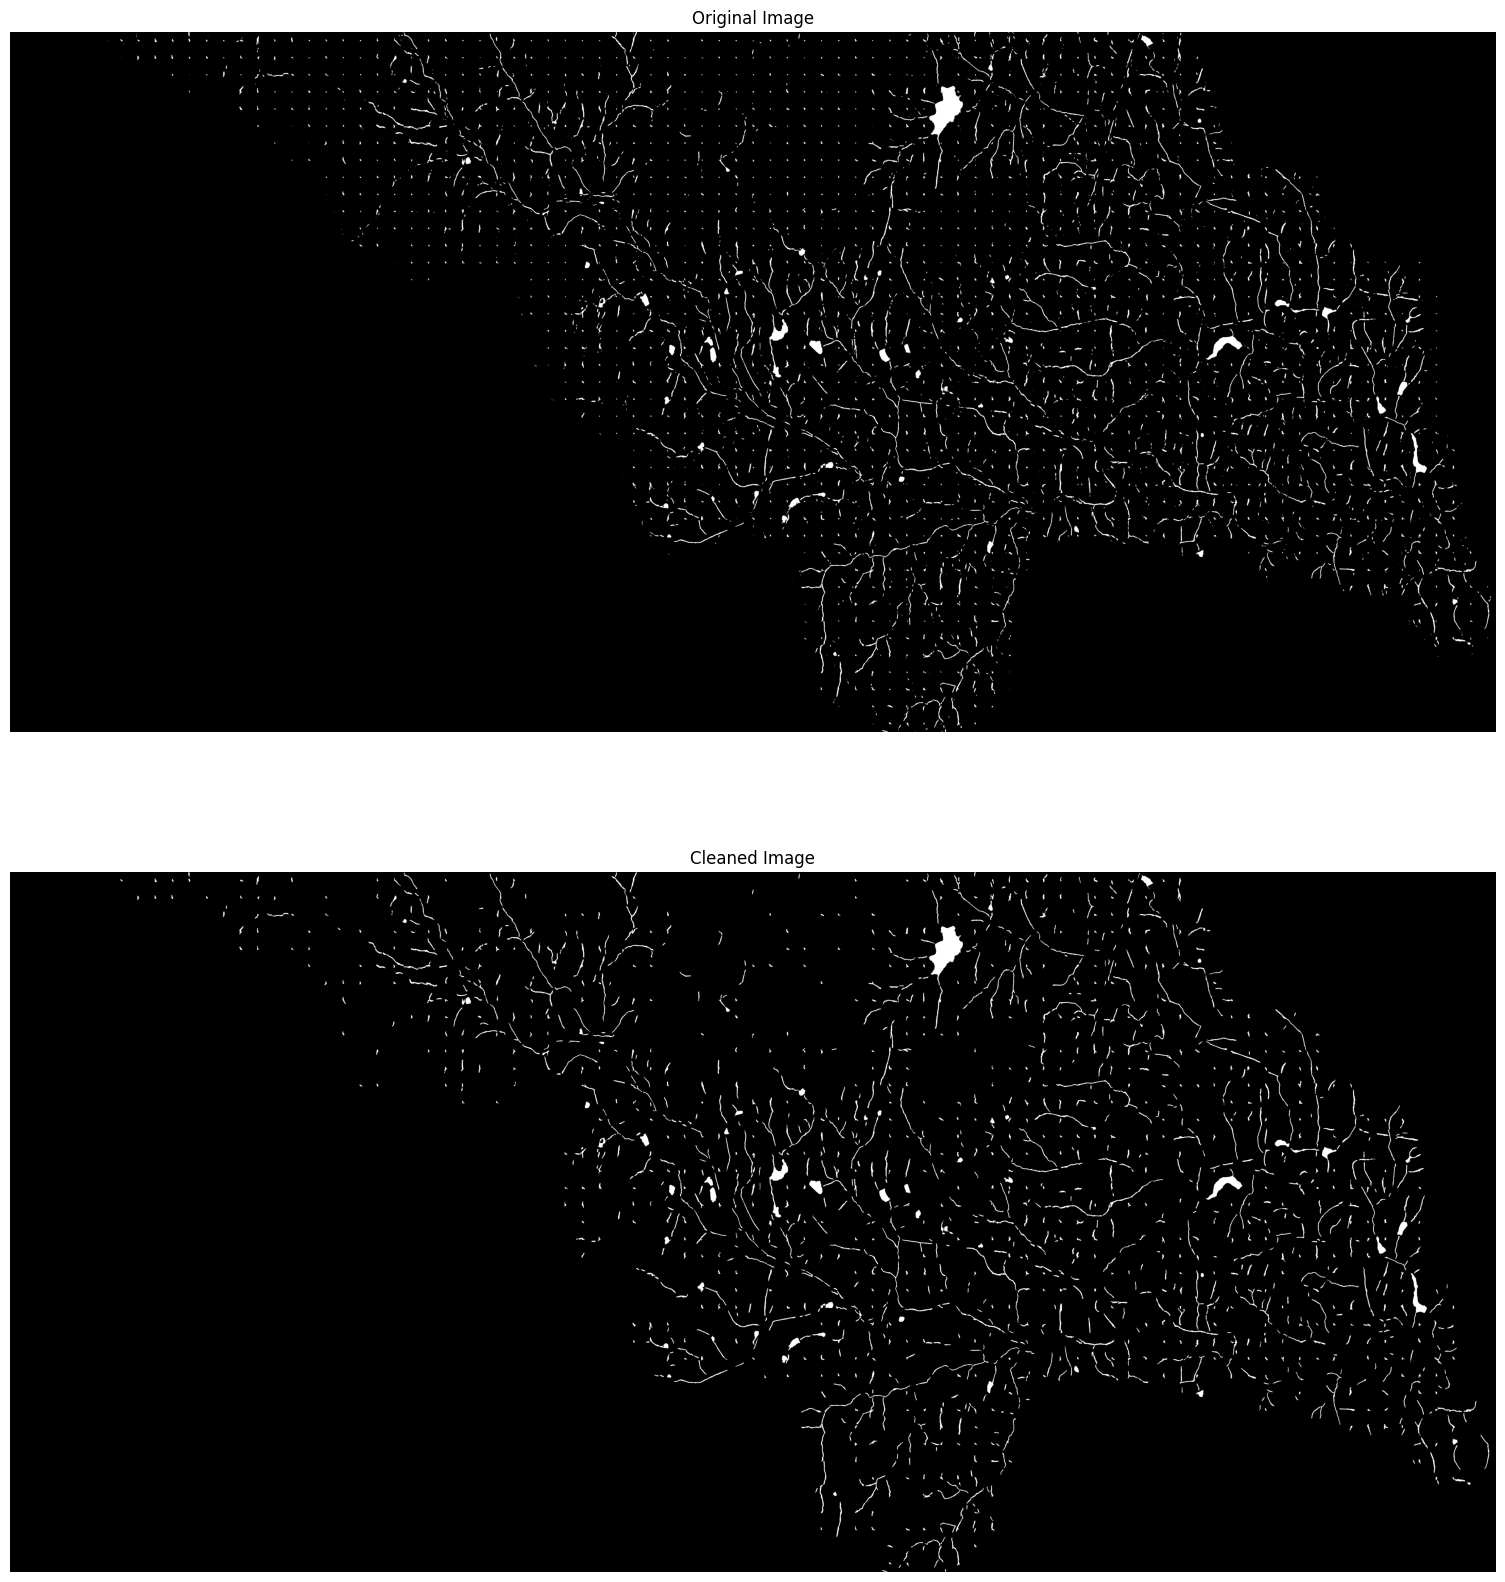

rowancreek-to-covington-Unet-densenet121-ImgN_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


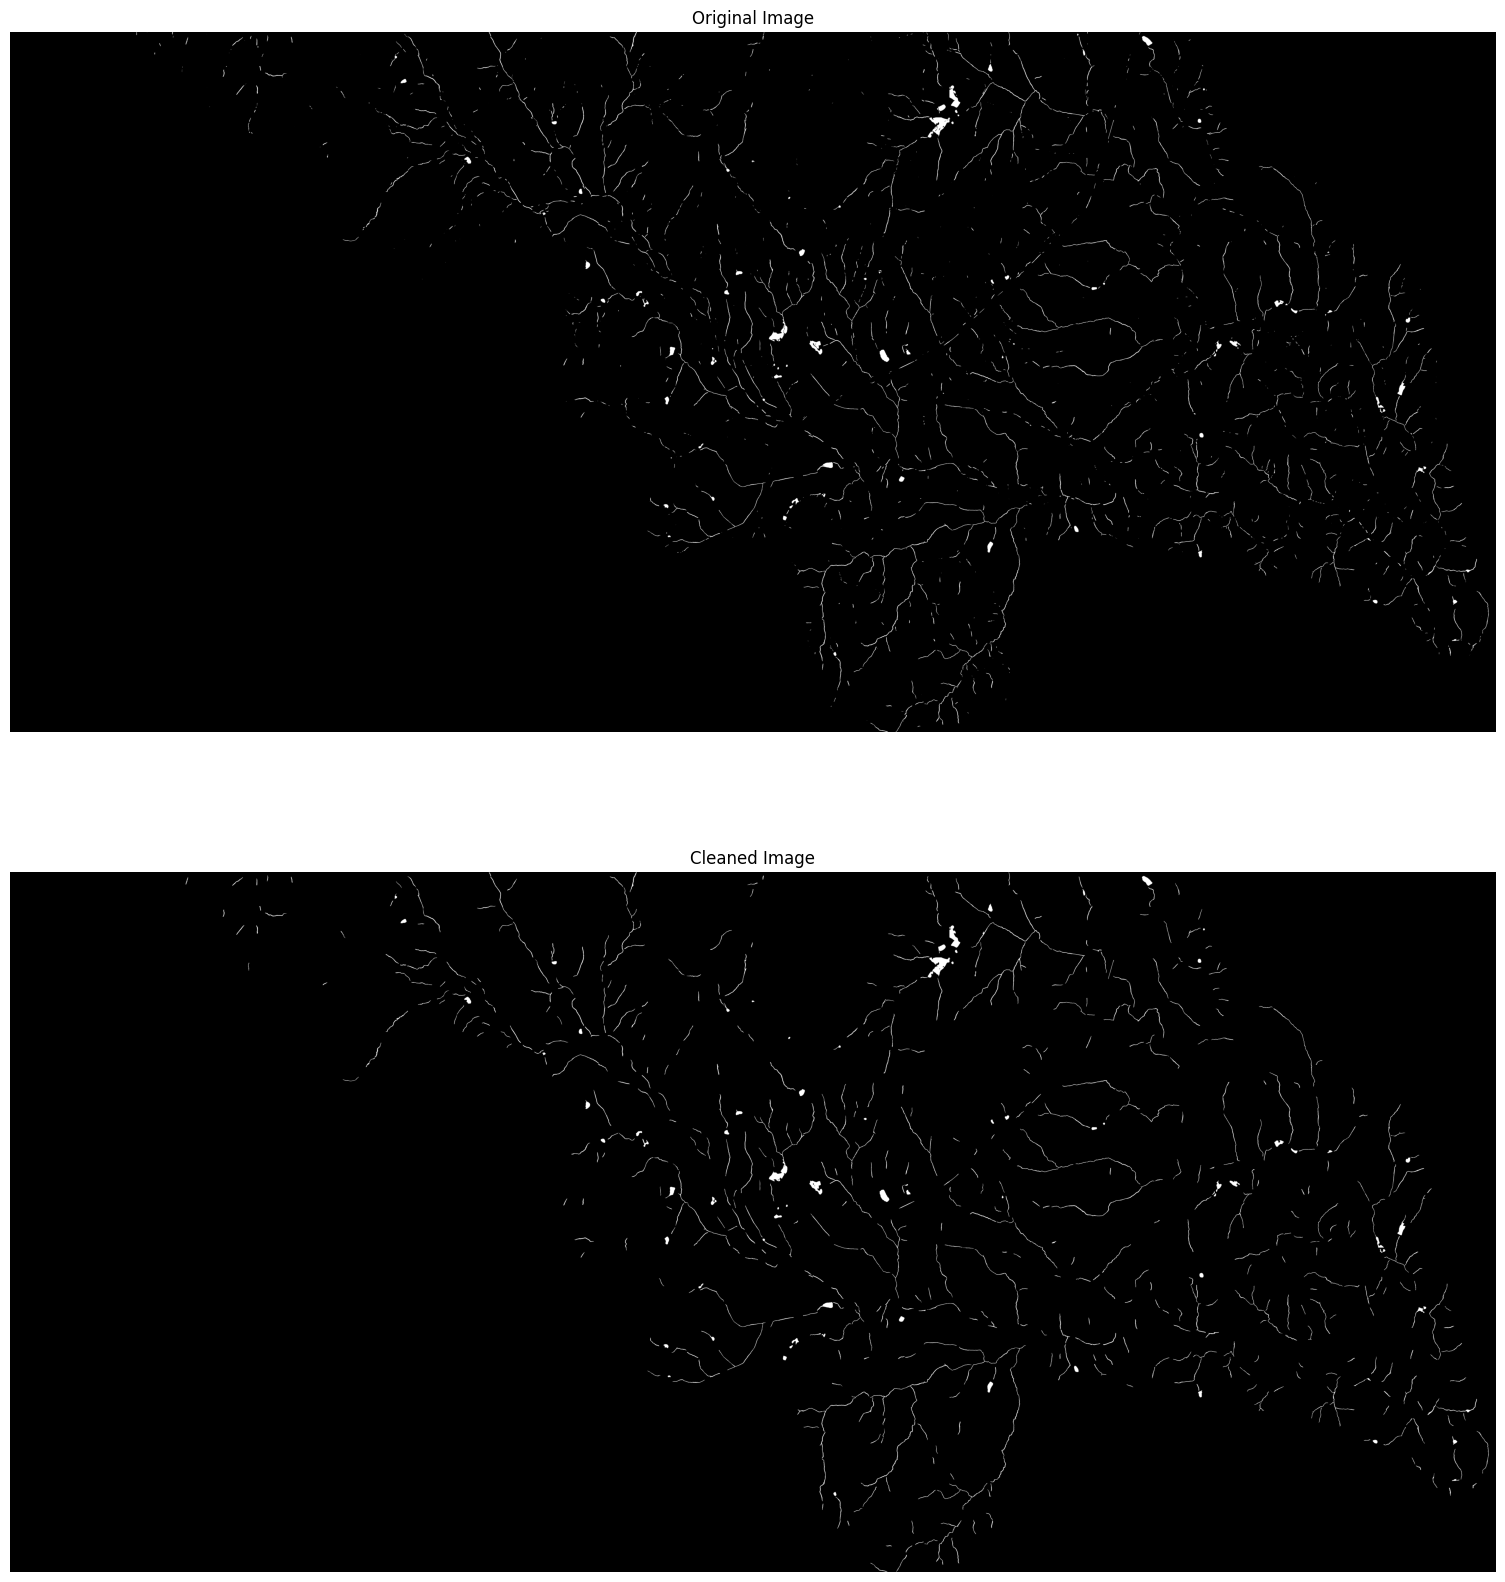

rowancreek-to-covington-Unet-densenet169-ImgN_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


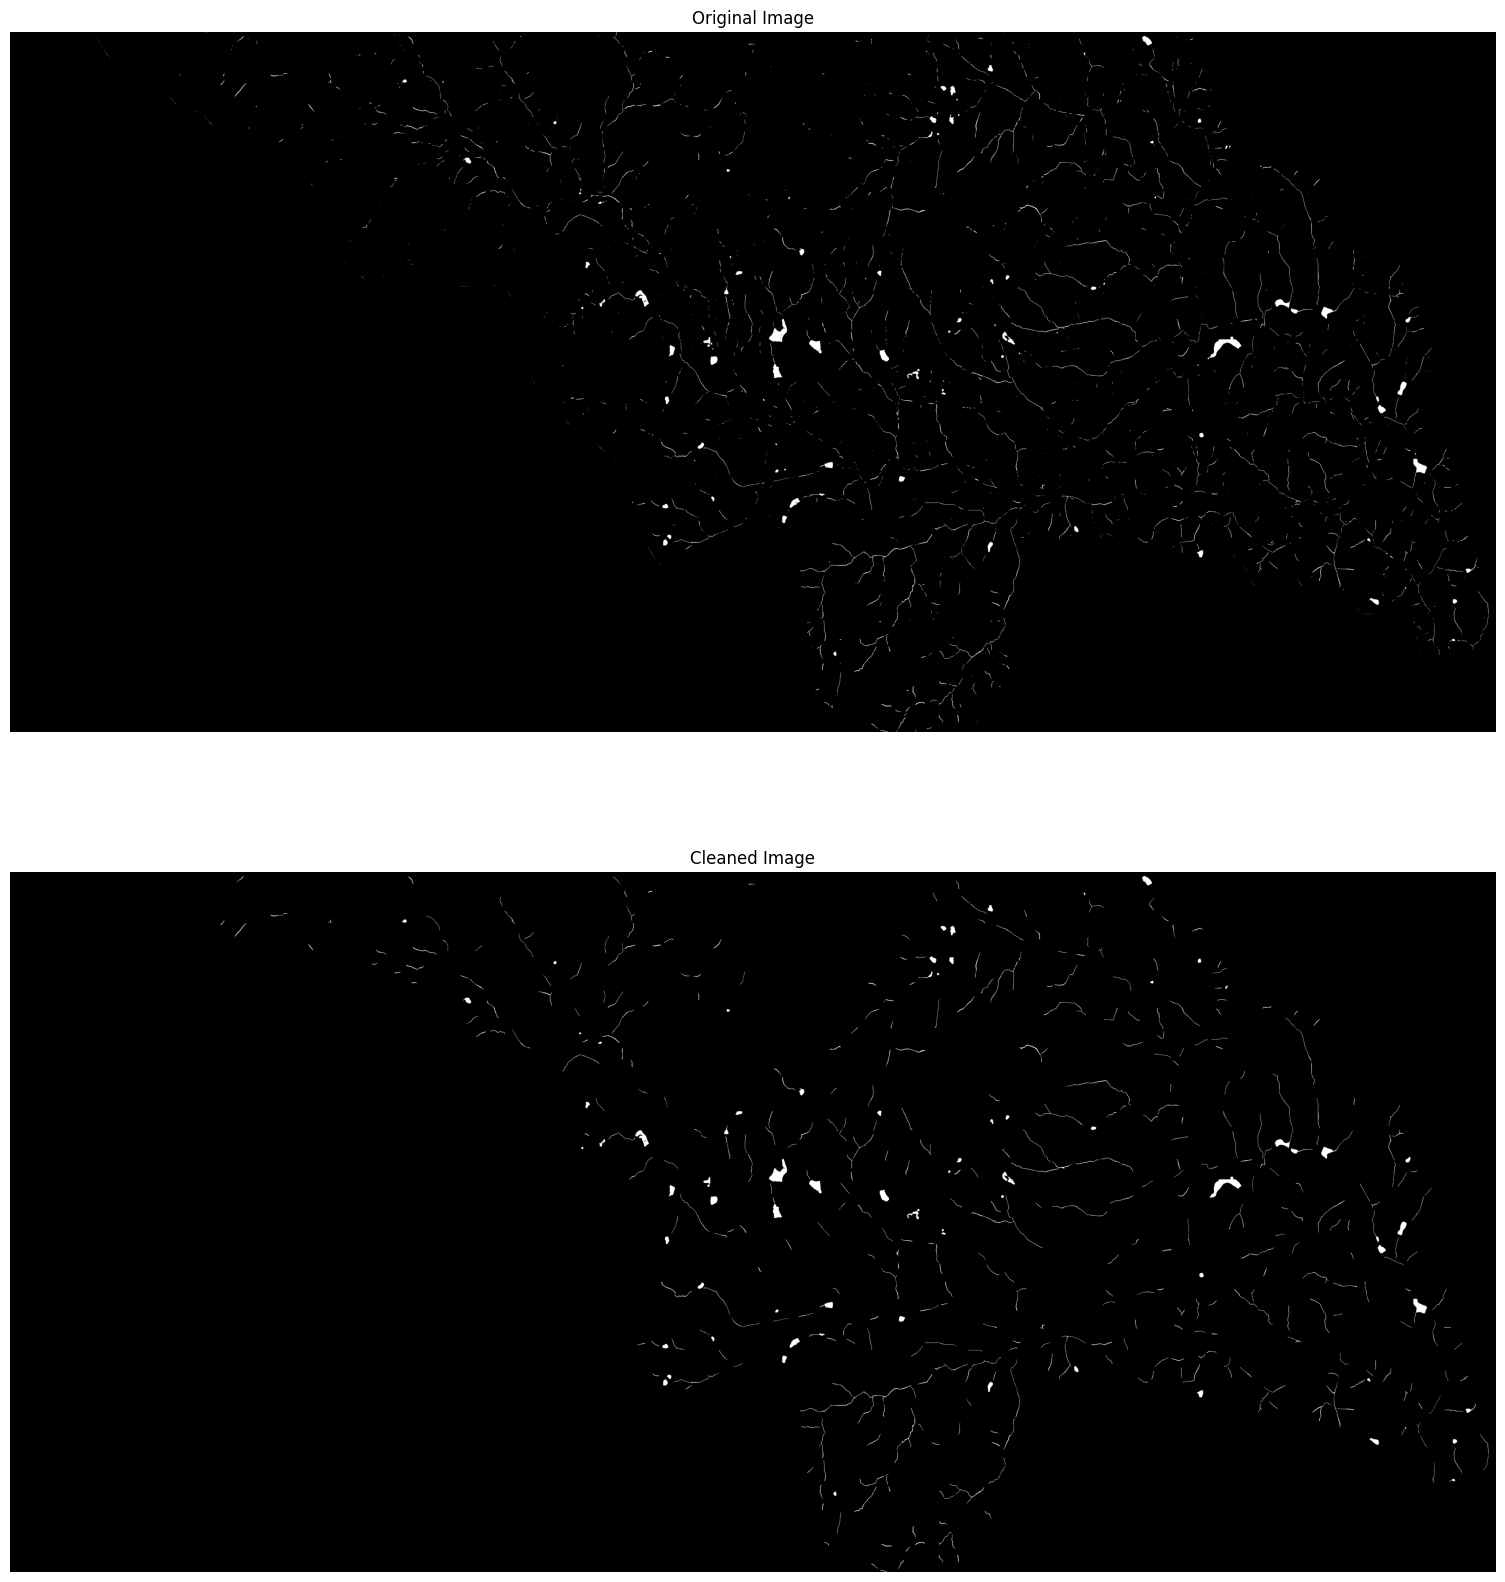

rowancreek-to-covington-Unet-resnet50-noImgN_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


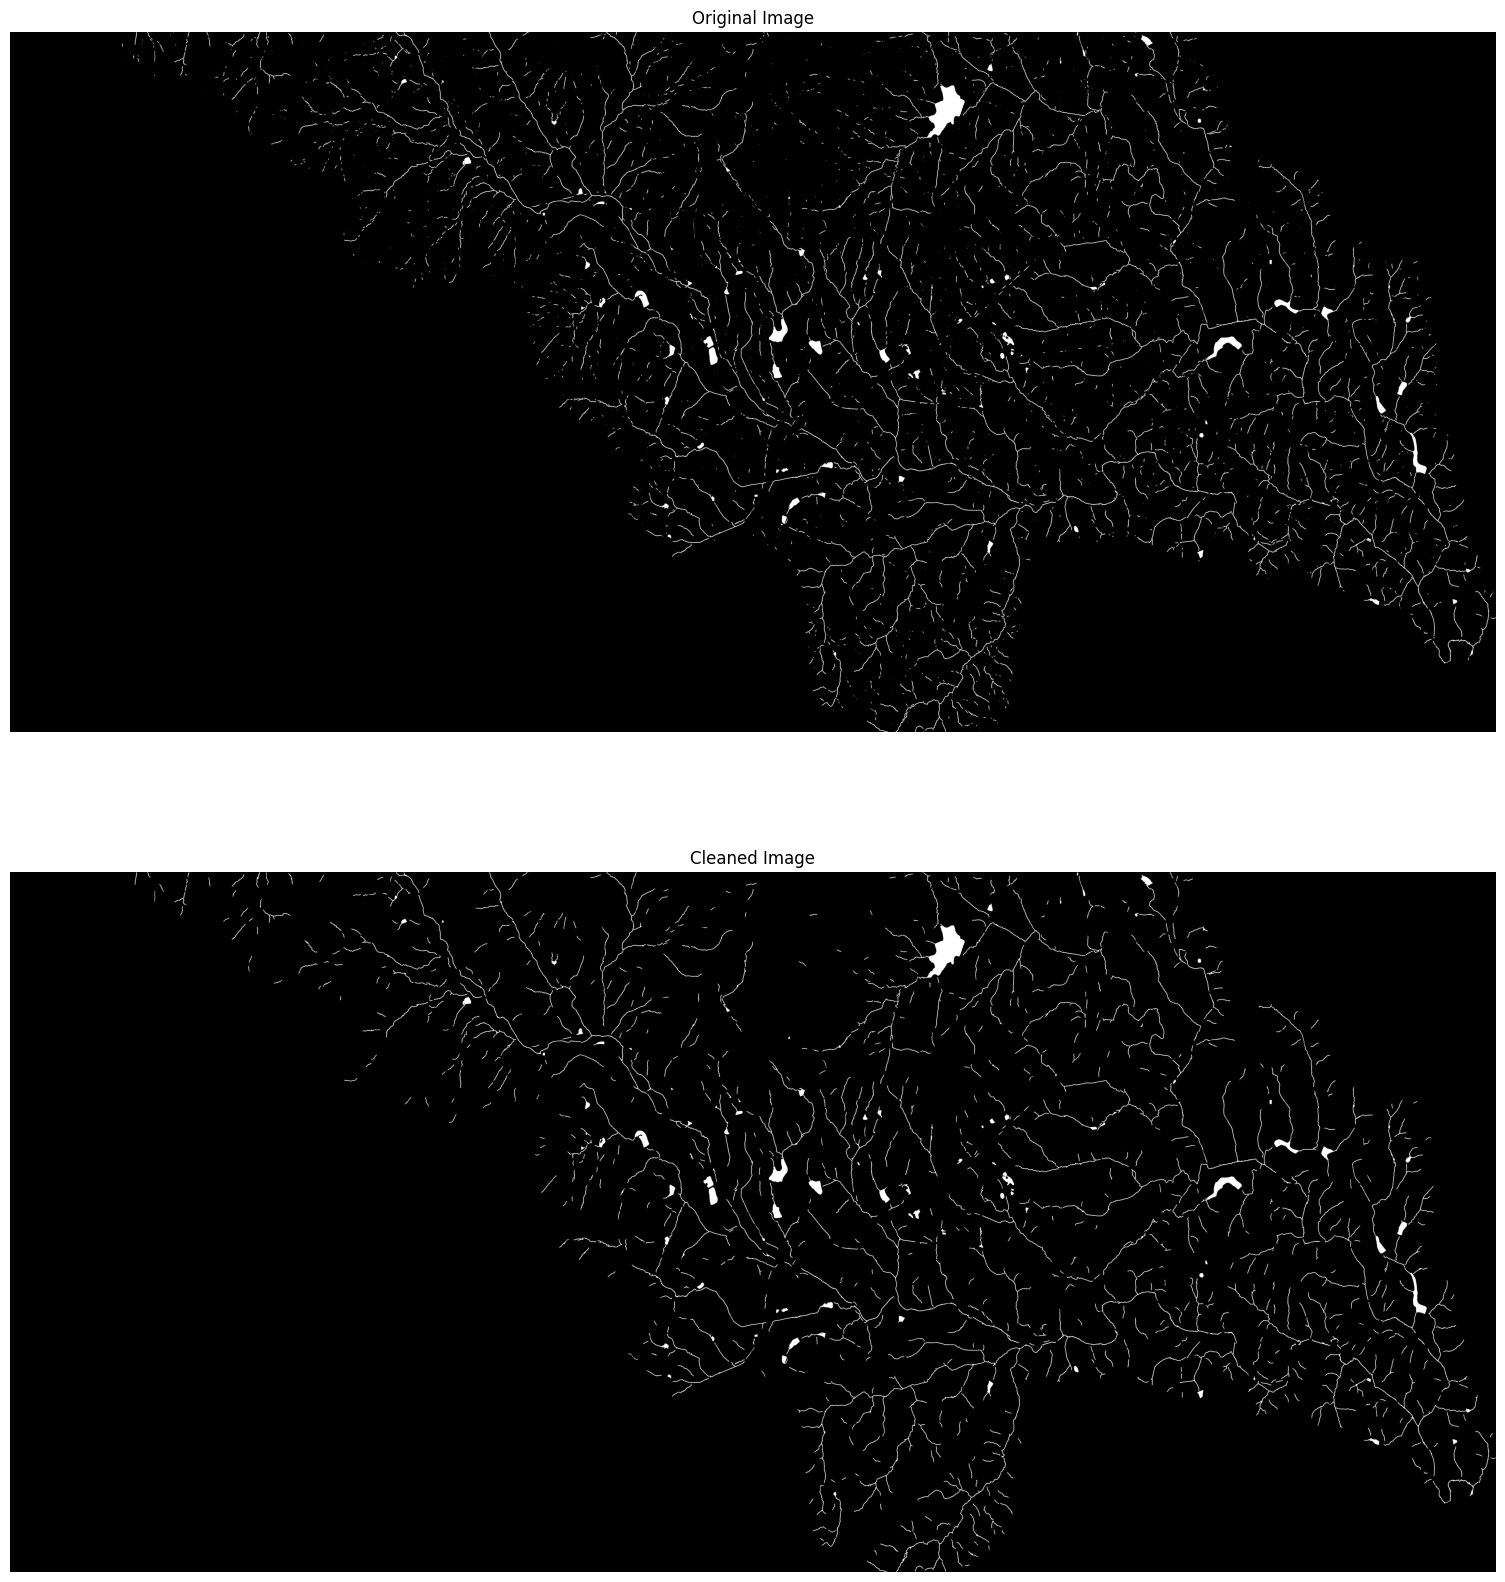

rowancreek-to-covington-Unet-attentionUnet-noImgN_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


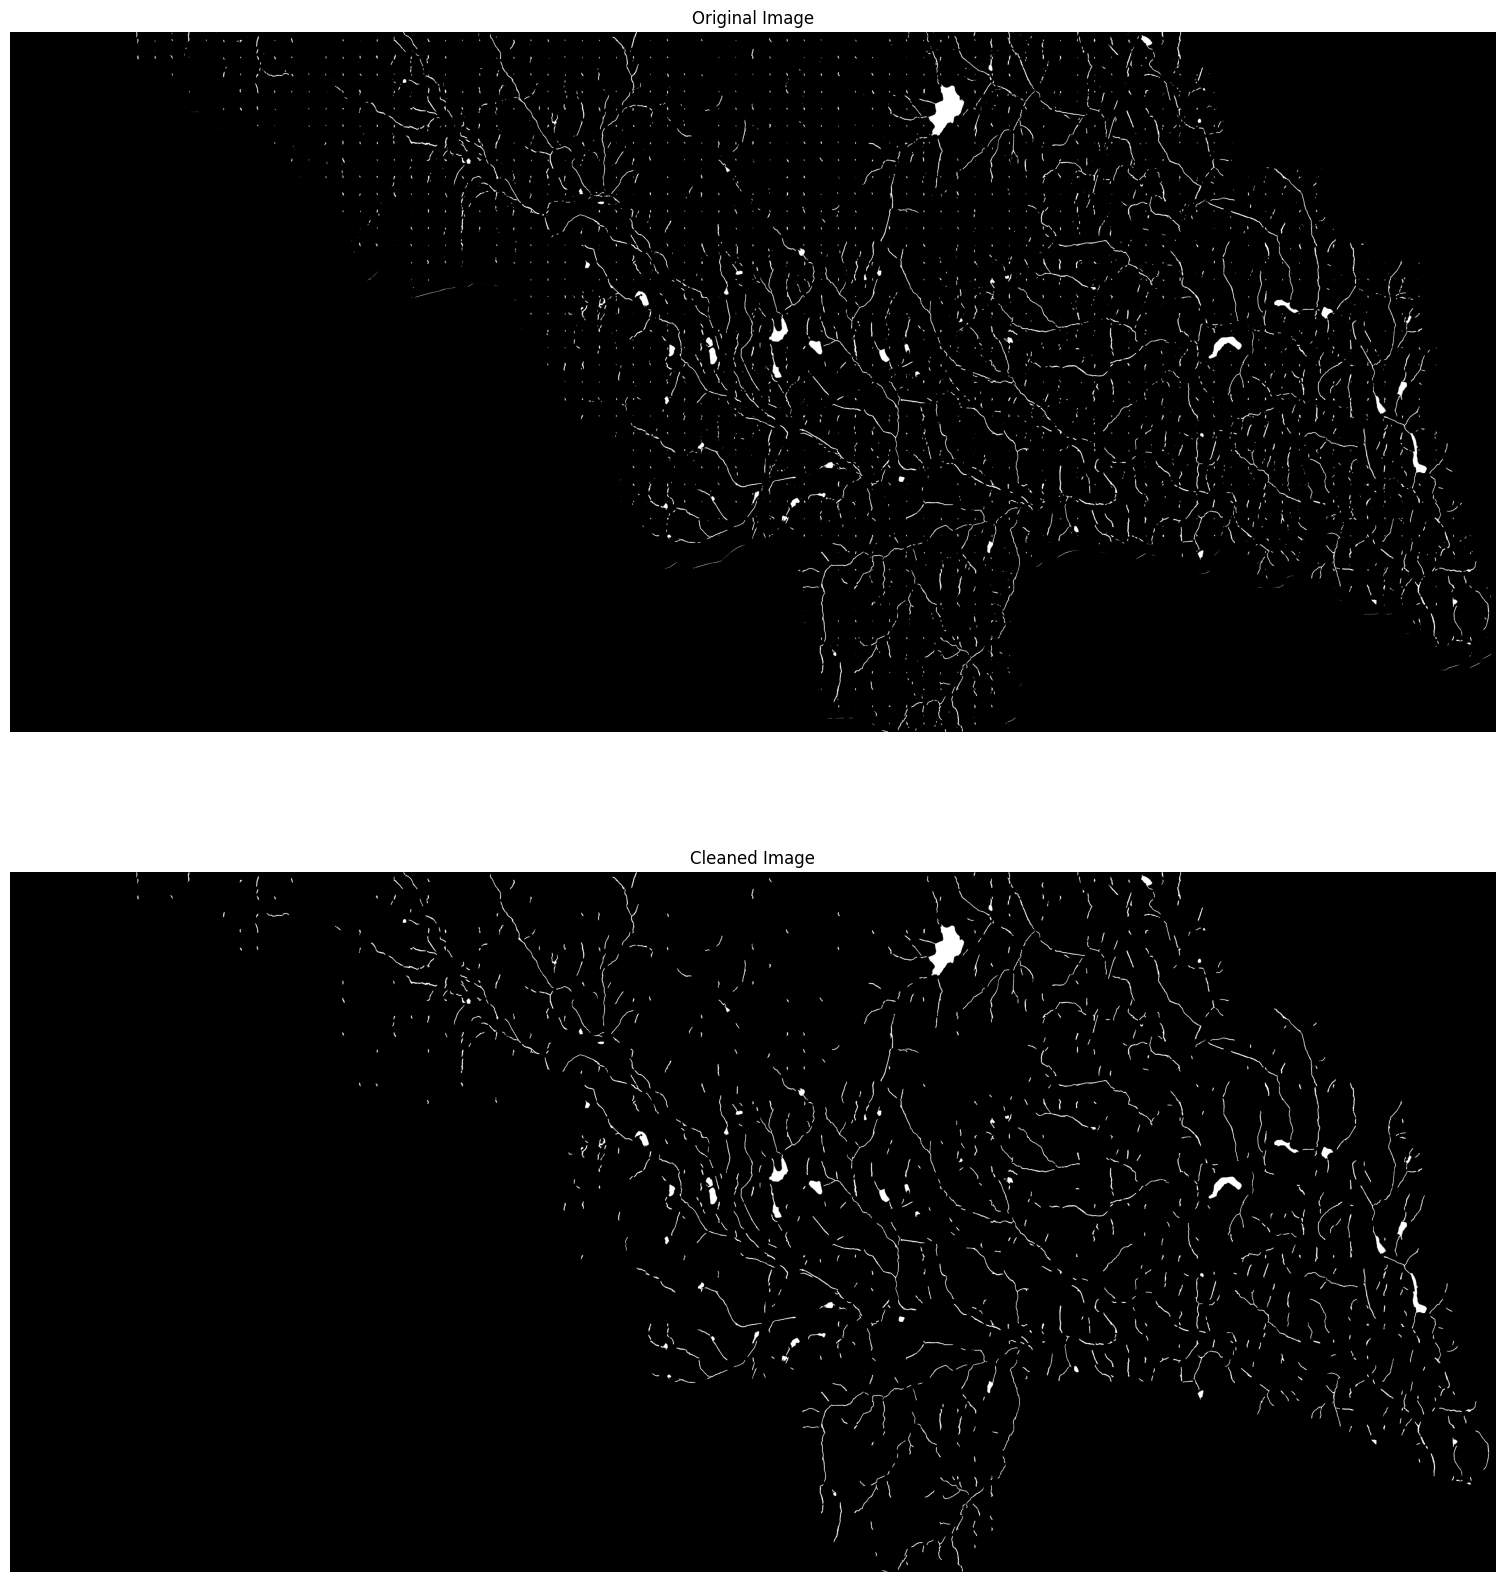

rowancreek-to-covington-Unet-densenet121-noImgN_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


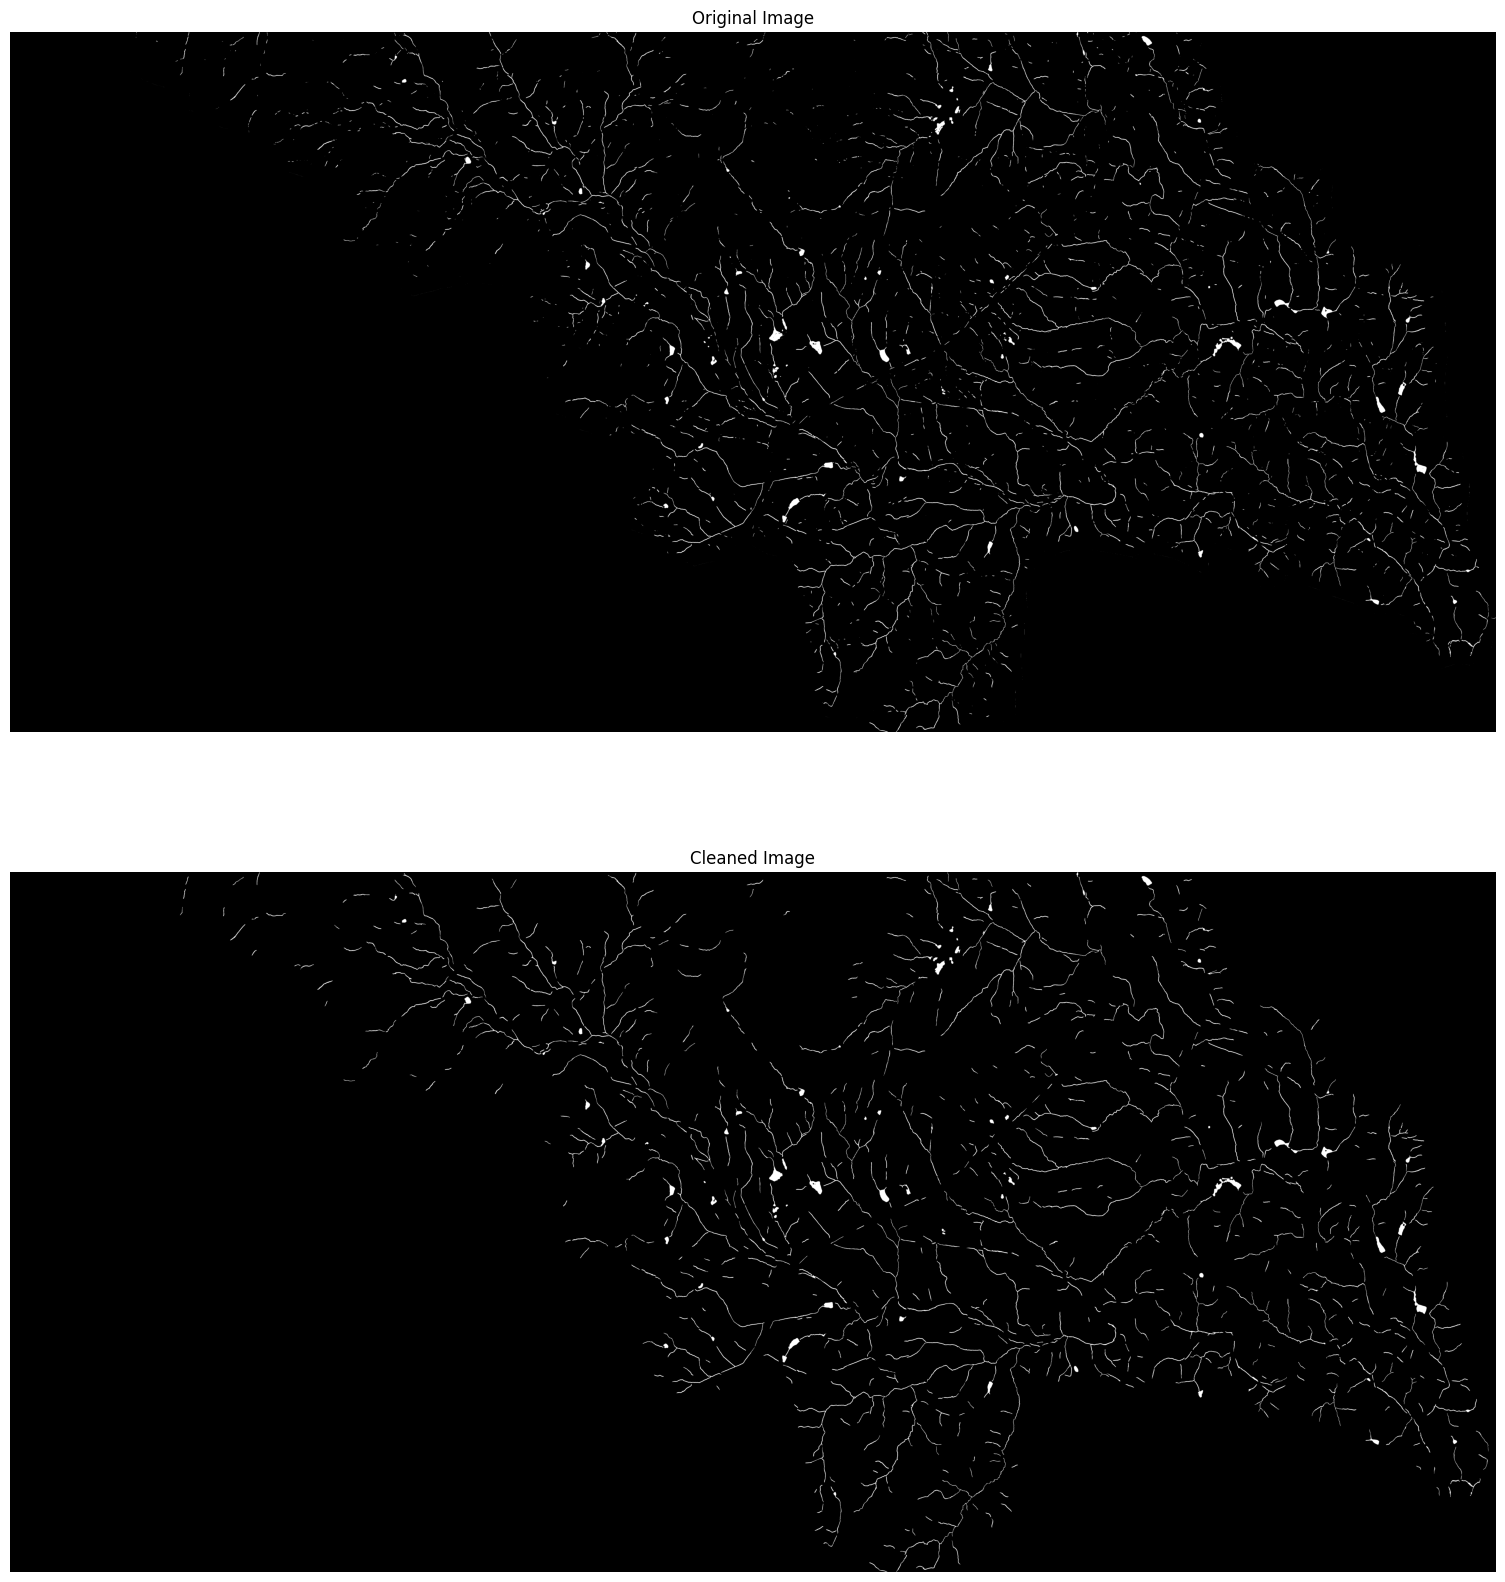

rowancreek-to-covington-Unet-densenet169-noImgN_predict.tif
image shape: (6724, 14268) mask shape: (6934, 14406)


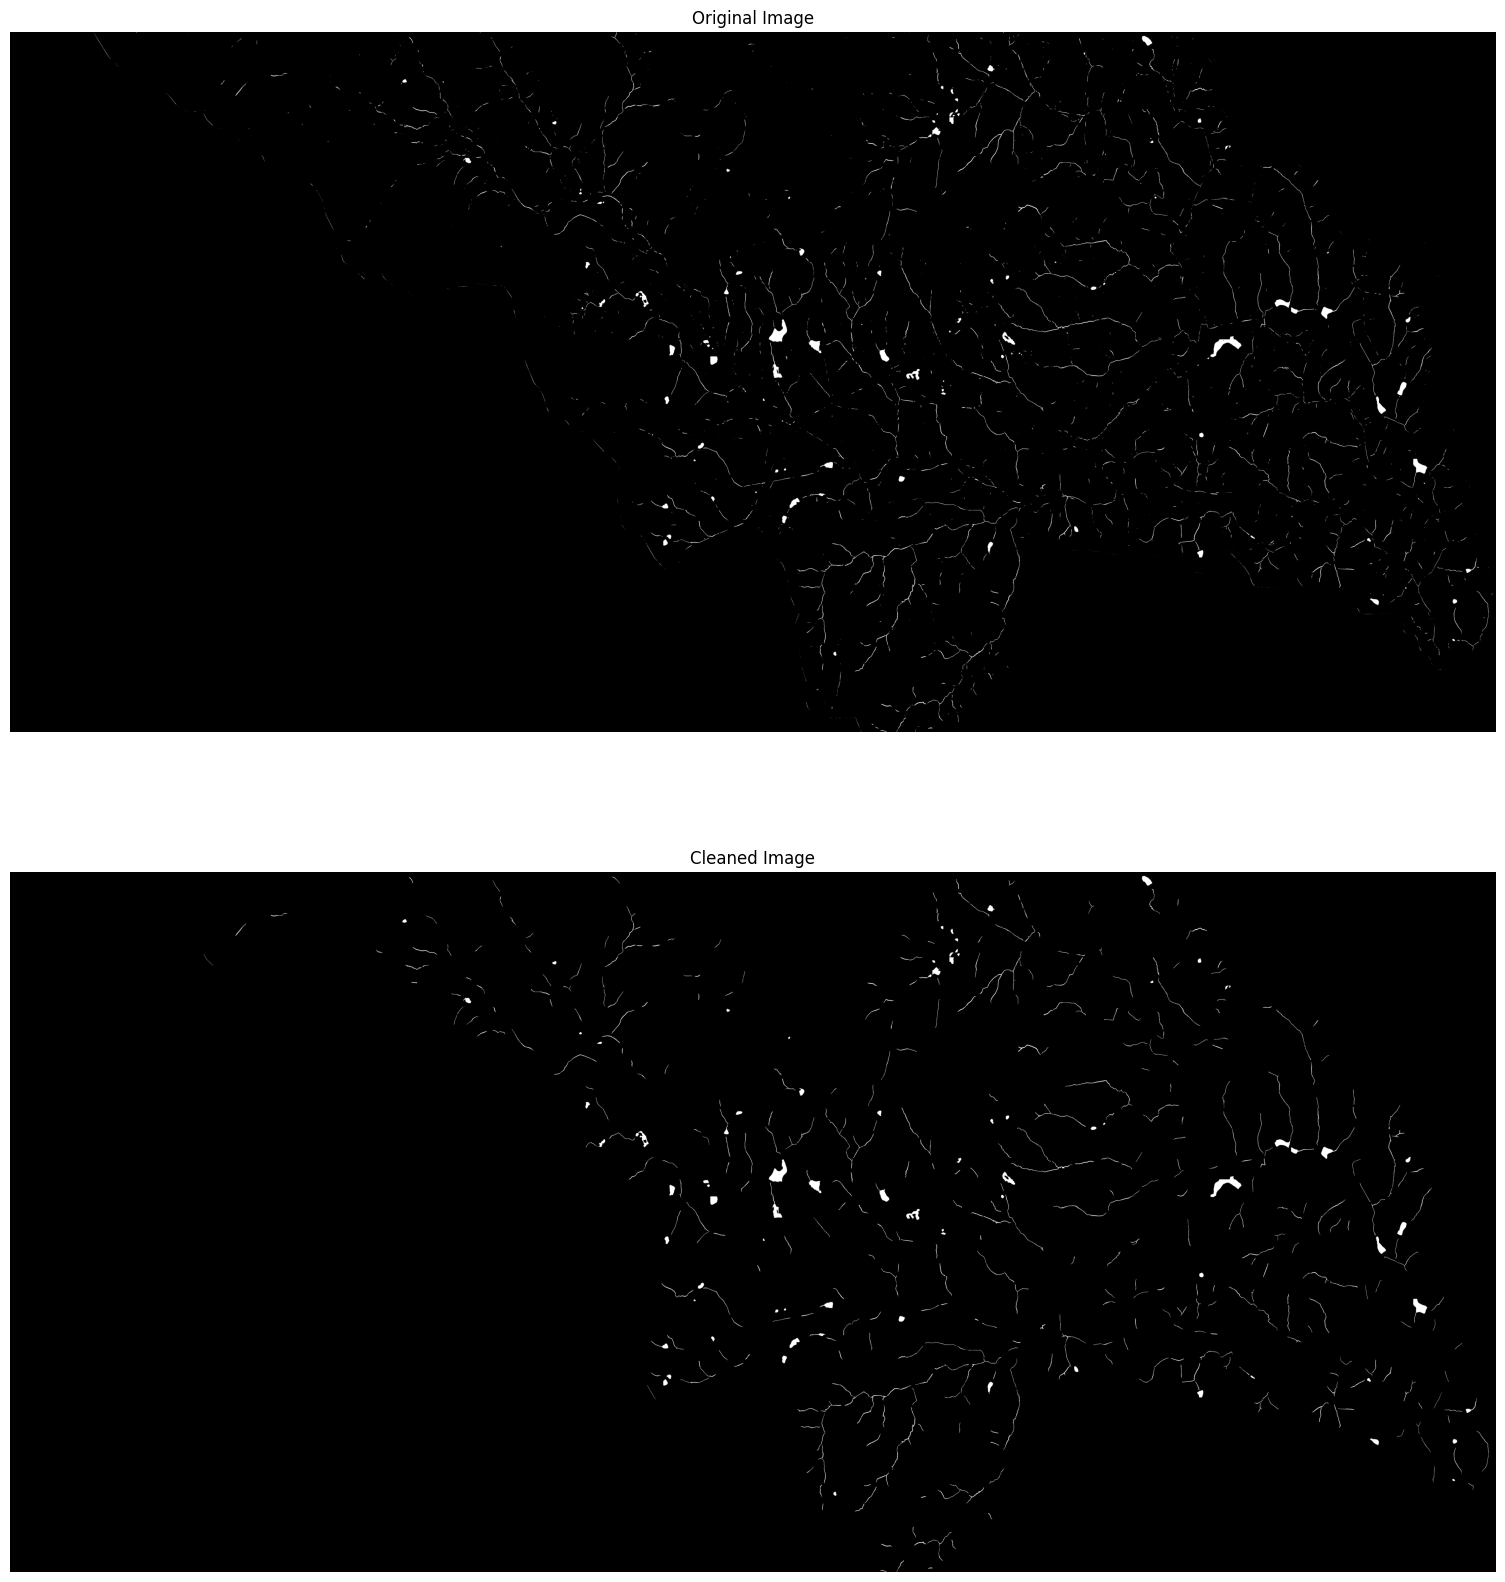

In [ ]:
def remove_small_objects_and_connect_lines(image, min_size, connectivity):
    # Load mask from npy file
    mask = np.load('/content/drive/MyDrive/Transfere Learning research/Notebooks/samples/covington/bottom_half_test_mask.npy')
    print("image shape:", image.shape, "mask shape:", mask.shape)
    # Apply mask to image
    image = image * mask[:image.shape[0],:image.shape[1]]

    # Create a binary version of the image (needed for morphological operations)
    binary = np.array(image > 0, dtype=np.int)

    # Label each distinct object in the image
    labeled, num_objects = label(binary)

    # Calculate the size of each object
    object_sizes = sum(binary, labeled, range(num_objects + 1))

    # Create a mask that removes all objects smaller than min_size
    mask = object_sizes > min_size
    cleaned = mask[labeled]

    # Create a structuring element for the closing operation
    structure = disk(connectivity)

    # Perform closing operation to connect lines
    cleaned = binary_closing(cleaned, structure)

    return cleaned

# Define the directory
name_id = '06272023'
directory = '/content/drive/MyDrive/Transfere Learning research/Notebooks/predicts_rerun_covington_'+name_id+'/'  # Change this to your directory

# Define the parameters for the cleaning function
min_size = 300  # define your minimum size here
connectivity = 10  # define your connectivity here

# Process all TIFF files in the directory
for filename in os.listdir(directory):
  if filename.endswith('.tif') and not filename.endswith('_cleaned.tif'):

    print(filename)

    # Read the TIFF image
    image = imread(os.path.join(directory, filename))

    # Remove small objects and connect lines
    min_size = 250  # define your minimum size here
    connectivity = 3  # define your connectivity here
    image_clean = remove_small_objects_and_connect_lines(image, min_size, connectivity)

    # Write the cleaned image to a new TIFF file
    output_filename = os.path.splitext(filename)[0] + '_cleaned.tif'
    imwrite(os.path.join(directory, output_filename), image_clean)

    # Visualization of the input and the output images
    fig, ax = plt.subplots(2, 1, figsize=(40,20))

    # Display the original image
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')

    # Display the cleaned image
    ax[1].imshow(image_clean, cmap='gray')
    ax[1].set_title('Cleaned Image')

    # Hide the axis
    for a in ax:
        a.axis('off')

    plt.show()


In [ ]:
import os
import numpy as np
from tifffile import imread
from sklearn.metrics import f1_score, precision_score,recall_score, cohen_kappa_score

def clip_reference_image(ref_image, target_image):
    return ref_image[:target_image.shape[0], :target_image.shape[1]]

def calculate_scores(reference, target):
    f1_stream = f1_score(reference, target,labels=[1], average = 'micro')
    precision_stream = precision_score(reference, target,labels=[1], average = 'micro')
    recall_stream = recall_score(reference, target,labels=[1], average = 'micro')
    cohen_kappa = cohen_kappa_score(reference, target)
    return precision_stream, recall_stream, f1_stream, cohen_kappa

# Define the directory
directory = '/content/drive/MyDrive/Transfere Learning research/Notebooks/predicts_rerun_covington_'+name_id+'/'  # Change this to your directory

# Read the corresponding reference image
ref_image = np.load('/content/drive/MyDrive/Transfere Learning research/Notebooks/samples/covington/bottom_half_test_label.npy')

# Process all TIFF files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.tif') and not filename.endswith('_cleaned.tif'):

        # Read the corresponding cleaned TIFF image
        cleaned_filename = os.path.splitext(filename)[0] + '_cleaned.tif'
        cleaned_image = imread(os.path.join(directory, cleaned_filename))

        # Clip the reference images to the same size as the original and cleaned images
        ref_image_clipped = clip_reference_image(ref_image, cleaned_image)

        # Calculate the precision, recall, and F1-score
        print(f"Evaluating scores for {filename}:")
        precision, recall, f1, cohen_kappa = calculate_scores(ref_image_clipped.flatten(), cleaned_image.flatten())
        print(f"Original - Precision: {precision}, Recall: {recall}, F1-Score: {f1}, Cohen Kappa: {cohen_kappa}")


Evaluating scores for covington-Unet-resnet50_predict.tif:
Original - Precision: 0.5971316132100388, Recall: 0.4656771194487464, F1-Score: 0.5232748302242421, Cohen Kappa: 0.5159549695573571
Evaluating scores for covington-Unet-attentionUnet_predict.tif:
Original - Precision: 0.515341645994615, Recall: 0.42601227853575685, F1-Score: 0.46643852670834646, Cohen Kappa: 0.4579725370523352
Evaluating scores for covington-Unet-densenet121_predict.tif:
Original - Precision: 0.16243965649989003, Recall: 0.2440383142503014, F1-Score: 0.19504870026028345, Cohen Kappa: 0.1780164755462883
Evaluating scores for covington-Unet-densenet169_predict.tif:
Original - Precision: 0.5570223159408288, Recall: 0.31448707757802136, F1-Score: 0.4020067289892811, Cohen Kappa: 0.3944652404867909
Evaluating scores for covington-Unet-resnet50-tf_predict.tif:
Original - Precision: 0.6762842278182375, Recall: 0.5239367421048435, F1-Score: 0.5904415335830788, Cohen Kappa: 0.5841766386398154
Evaluating scores for covin

In [ ]:
# data = '''
# Run_1
# Without ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50_predict.tif:
# Original - Precision: 0.39218102181907366, Recall: 0.6500297178256216, F1-Score: 0.4892087737198439, Cohen Kappa: 0.47797154799354014
# Evaluating scores for covington-Unet-attentionUnet_predict.tif:
# Original - Precision: 0.6911648740105142, Recall: 0.5527074630399644, F1-Score: 0.6142302110561129, Cohen Kappa: 0.6082219768600159
# Evaluating scores for covington-Unet-densenet121_predict.tif:
# Original - Precision: 0.18081235270097631, Recall: 0.4824966839255556, F1-Score: 0.2630489131723355, Cohen Kappa: 0.24407107919181004
# Evaluating scores for covington-Unet-densenet169_predict.tif:
# Original - Precision: 0.724708648299378, Recall: 0.3936023320036821, F1-Score: 0.5101389846258508, Cohen Kappa: 0.5041152884932315
# With ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50-tf_predict.tif:
# Original - Precision: 0.5847146706788882, Recall: 0.675100811079192, F1-Score: 0.6266653397120602, Cohen Kappa: 0.6196304928898637
# Evaluating scores for covington-Unet-attentionUnet-tf_predict.tif:
# Original - Precision: 0.4429833994756953, Recall: 0.21770904557458087, F1-Score: 0.29194065658764445, Cohen Kappa: 0.2837954619889954
# Evaluating scores for covington-Unet-densenet121-tf_predict.tif:
# Original - Precision: 0.548131773113459, Recall: 0.7167927459512483, F1-Score: 0.6212179033158961, Cohen Kappa: 0.6136620481125699
# Evaluating scores for covington-Unet-densenet169-tf_predict.tif:
# Original - Precision: 0.7435912457726805, Recall: 0.39099296194910277, F1-Score: 0.5125030679703891, Cohen Kappa: 0.5066351002358278
# With ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-ImgN_predict.tif:
# Original - Precision: 0.6631868233666619, Recall: 0.6486289934838231, F1-Score: 0.6558271309227245, Cohen Kappa: 0.6498517902921666
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-ImgN_predict.tif:
# Original - Precision: 0.4298287359877822, Recall: 0.3835169959385638, F1-Score: 0.4053543754478871, Cohen Kappa: 0.3955169647533786
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-ImgN_predict.tif:
# Original - Precision: 0.7792547024560362, Recall: 0.4059799271792468, F1-Score: 0.5338382113498273, Cohen Kappa: 0.5282613616324451
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-ImgN_predict.tif:
# Original - Precision: 0.832338629970349, Recall: 0.2909574455233599, F1-Score: 0.4311866245595944, Cohen Kappa: 0.42605574035866967
# Without ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-noImgN_predict.tif:
# Original - Precision: 0.5487858601297517, Recall: 0.6553855706668148, F1-Score: 0.5973673264729338, Cohen Kappa: 0.5896593503461338
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-noImgN_predict.tif:
# Original - Precision: 0.40934654578021784, Recall: 0.4453113485852624, F1-Score: 0.4265722309285914, Cohen Kappa: 0.4160715280718077
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-noImgN_predict.tif:
# Original - Precision: 0.7933646398581492, Recall: 0.3897160618807276, F1-Score: 0.5226810692229206, Cohen Kappa: 0.5171920390186922
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-noImgN_predict.tif:
# Original - Precision: 0.8415199188119791, Recall: 0.2674580145109968, F1-Score: 0.4059075296160253, Cohen Kappa: 0.40092093437229626
# Run_2
# Without ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50_predict.tif:
# Original - Precision: 0.4223769598143149, Recall: 0.11255505650010993, F1-Score: 0.17774468951696176, Cohen Kappa: 0.17172982701763784
# Evaluating scores for covington-Unet-attentionUnet_predict.tif:
# Original - Precision: 0.3971228484012777, Recall: 0.3847896678610172, F1-Score: 0.39085899191588996, Cohen Kappa: 0.3803342860514084
# Evaluating scores for covington-Unet-densenet121_predict.tif:
# Original - Precision: 0.5321477224852623, Recall: 0.6271445760136074, F1-Score: 0.5757539461389806, Cohen Kappa: 0.5676822453516941
# Evaluating scores for covington-Unet-densenet169_predict.tif:
# Original - Precision: 0.11950740402248701, Recall: 0.6848629959917176, F1-Score: 0.2035037558830801, Cohen Kappa: 0.1793896093604489
# With ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50-tf_predict.tif:
# Original - Precision: 0.6430026036081862, Recall: 0.657403604313192, F1-Score: 0.6501233639455914, Cohen Kappa: 0.6439103888446811
# Evaluating scores for covington-Unet-attentionUnet-tf_predict.tif:
# Original - Precision: 0.6187749112613774, Recall: 0.47119968204342666, F1-Score: 0.5349969498991357, Cohen Kappa: 0.5279539078138467
# Evaluating scores for covington-Unet-densenet121-tf_predict.tif:
# Original - Precision: 0.7290580491431216, Recall: 0.3577905400671188, F1-Score: 0.4800117987598337, Cohen Kappa: 0.4740359008138294
# Evaluating scores for covington-Unet-densenet169-tf_predict.tif:
# Original - Precision: 0.6435030990140503, Recall: 0.6343922221443706, F1-Score: 0.6389151821453513, Cohen Kappa: 0.6326206335083224
# With ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-ImgN_predict.tif:
# Original - Precision: 0.736380490193732, Recall: 0.483194932023494, F1-Score: 0.5835068736555944, Cohen Kappa: 0.577732719136258
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-ImgN_predict.tif:
# Original - Precision: 0.7401192063722095, Recall: 0.33624270040807647, F1-Score: 0.46240893329063726, Cohen Kappa: 0.45654968839162746
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-ImgN_predict.tif:
# Original - Precision: 0.48728264471679544, Recall: 0.4058856999272759, F1-Score: 0.4428752059996184, Cohen Kappa: 0.43399801331452925
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-ImgN_predict.tif:
# Original - Precision: 0.8334301621442451, Recall: 0.2764114155107721, F1-Score: 0.4151396298098883, Cohen Kappa: 0.4100687460818816
# Without ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-noImgN_predict.tif:
# Original - Precision: 0.5213716482837311, Recall: 0.4239368629090127, F1-Score: 0.467632859254008, Cohen Kappa: 0.4592633365160177
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-noImgN_predict.tif:
# Original - Precision: 0.6399735890501245, Recall: 0.6521915084333391, F1-Score: 0.6460247861716293, Cohen Kappa: 0.6397492727467244
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-noImgN_predict.tif:
# Original - Precision: 0.7502437106274218, Recall: 0.3872262879536499, F1-Score: 0.5108074718264717, Cohen Kappa: 0.5049914660194315
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-noImgN_predict.tif:
# Original - Precision: 0.8197579289476633, Recall: 0.26509387691988023, F1-Score: 0.4006313237350703, Cohen Kappa: 0.39553345305908905
# Run_3
# Without ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50_predict.tif:
# Original - Precision: 0.5373788105673906, Recall: 0.3563547825162542, F1-Score: 0.4285337614039165, Cohen Kappa: 0.4205598695281333
# Evaluating scores for covington-Unet-attentionUnet_predict.tif:
# Original - Precision: 0.6266535411943062, Recall: 0.45141014706699556, F1-Score: 0.5247886006564229, Cohen Kappa: 0.5178203618040701
# Evaluating scores for covington-Unet-densenet121_predict.tif:
# Original - Precision: 0.1358496254689306, Recall: 0.4414444071293788, F1-Score: 0.20776260964959037, Cohen Kappa: 0.1862874080126783
# Evaluating scores for covington-Unet-densenet169_predict.tif:
# Original - Precision: 0.6020375933455856, Recall: 0.4190763071615128, F1-Score: 0.4941656190683082, Cohen Kappa: 0.4868976989511169
# With ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50-tf_predict.tif:
# Original - Precision: 0.6689923510055561, Recall: 0.6603041124155277, F1-Score: 0.6646198386876631, Cohen Kappa: 0.6587698255153014
# Evaluating scores for covington-Unet-attentionUnet-tf_predict.tif:
# Original - Precision: 0.6341003412095169, Recall: 0.5054645765934674, F1-Score: 0.5625221617126941, Cohen Kappa: 0.5557208154847685
# Evaluating scores for covington-Unet-densenet121-tf_predict.tif:
# Original - Precision: 0.6891510031038903, Recall: 0.46696972405911674, F1-Score: 0.5567111568775001, Cohen Kappa: 0.5504442044133637
# Evaluating scores for covington-Unet-densenet169-tf_predict.tif:
# Original - Precision: 0.6179839152284092, Recall: 0.6087128798989111, F1-Score: 0.6133133636023658, Cohen Kappa: 0.6065754730083539
# With ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-ImgN_predict.tif:
# Original - Precision: 0.6671434547856131, Recall: 0.6366971656925824, F1-Score: 0.65156483100913, Cohen Kappa: 0.6455917347444883
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-ImgN_predict.tif:
# Original - Precision: 0.6369987581775893, Recall: 0.39751880316893495, F1-Score: 0.4895402329202884, Cohen Kappa: 0.48267956007920954
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-ImgN_predict.tif:
# Original - Precision: 0.688022596337062, Recall: 0.42638797950194857, F1-Score: 0.5264927865261474, Cohen Kappa: 0.5201563255444429
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-ImgN_predict.tif:
# Original - Precision: 0.8685709102923742, Recall: 0.24294322445656244, F1-Score: 0.37968643136196145, Cohen Kappa: 0.3749714834779956
# Without ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-noImgN_predict.tif:
# Original - Precision: 0.6391745583387555, Recall: 0.6259951243437314, F1-Score: 0.6325161954185634, Cohen Kappa: 0.6261316775528207
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-noImgN_predict.tif:
# Original - Precision: 0.5289991054882008, Recall: 0.3832838438920204, F1-Score: 0.44450422032924136, Cohen Kappa: 0.43633082502738063
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-noImgN_predict.tif:
# Original - Precision: 0.637983224893571, Recall: 0.47115256841744124, F1-Score: 0.5420209803499876, Cohen Kappa: 0.5352066368284456
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-noImgN_predict.tif:
# Original - Precision: 0.8186259226241303, Recall: 0.31559907995544745, F1-Score: 0.45556673044637513, Cohen Kappa: 0.4502876378636017
# Run_4
# Without ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50_predict.tif:
# Original - Precision: 0.4717583916343776, Recall: 0.28372489991374583, F1-Score: 0.3543416616816268, Cohen Kappa: 0.3458629750929181
# Evaluating scores for covington-Unet-attentionUnet_predict.tif:
# Original - Precision: 0.3522807099962784, Recall: 0.28988047635499997, F1-Score: 0.31804880828950305, Cohen Kappa: 0.30725598770316354
# Evaluating scores for covington-Unet-densenet121_predict.tif:
# Original - Precision: 0.4093366680987449, Recall: 0.5127696047045975, F1-Score: 0.4552520846734438, Cohen Kappa: 0.4445924995852457
# Evaluating scores for covington-Unet-densenet169_predict.tif:
# Original - Precision: 0.7573266821004275, Recall: 0.4289750007852271, F1-Score: 0.5477092694641627, Cohen Kappa: 0.5419932196148478
# With ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50-tf_predict.tif:
# Original - Precision: 0.6732716893210561, Recall: 0.5676122814350569, F1-Score: 0.6159436153700946, Cohen Kappa: 0.6097831446627423
# Evaluating scores for covington-Unet-attentionUnet-tf_predict.tif:
# Original - Precision: 0.5543329797392951, Recall: 0.43022169981130387, F1-Score: 0.484454711877987, Cohen Kappa: 0.4765605470976505
# Evaluating scores for covington-Unet-densenet121-tf_predict.tif:
# Original - Precision: 0.7091289738866967, Recall: 0.5292823265916553, F1-Score: 0.6061466541969186, Cohen Kappa: 0.6002501025019863
# Evaluating scores for covington-Unet-densenet169-tf_predict.tif:
# Original - Precision: 0.8744804974640936, Recall: 0.30222907852995823, F1-Score: 0.4492075875523061, Cohen Kappa: 0.44428142045437724
# With  ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-ImgN_predict.tif:
# Original - Precision: 0.6270661249274456, Recall: 0.6362332776828794, F1-Score: 0.6316164405082889, Cohen Kappa: 0.6250999639823868
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-ImgN_predict.tif:
# Original - Precision: 0.5280945546176602, Recall: 0.4146977600490948, F1-Score: 0.4645766103247818, Cohen Kappa: 0.4563230015657369
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-ImgN_predict.tif:
# Original - Precision: 0.8106102188005575, Recall: 0.30597038364988055, F1-Score: 0.44425403610381853, Cohen Kappa: 0.4389478829556964
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-ImgN_predict.tif:
# Original - Precision: 0.789502584284367, Recall: 0.35346575080999193, F1-Score: 0.4883112071472469, Cohen Kappa: 0.48279085736585237
# Without ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-noImgN_predict.tif:
# Original - Precision: 0.3928070202918073, Recall: 0.6059096191527762, F1-Score: 0.4766227830106203, Cohen Kappa: 0.4654294913462551
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-noImgN_predict.tif:
# Original - Precision: 0.756577413837468, Recall: 0.4528779177226964, F1-Score: 0.5665975333421246, Cohen Kappa: 0.5609231441408994
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-noImgN_predict.tif:
# Original - Precision: 0.4205576427369361, Recall: 0.4786484671158971, F1-Score: 0.4477266531537576, Cohen Kappa: 0.4373906742810788
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-noImgN_predict.tif:
# Original - Precision: 0.8056995583477008, Recall: 0.32969028227102176, F1-Score: 0.46791208678164165, Cohen Kappa: 0.46252559260080783
# Run_5
# Without ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50_predict.tif:
# Original - Precision: 0.5680558543645984, Recall: 0.44814964254046336, F1-Score: 0.5010286381088049, Cohen Kappa: 0.49331666695777354
# Evaluating scores for covington-Unet-attentionUnet_predict.tif:
# Original - Precision: 0.17057489226376765, Recall: 0.5306166086403974, F1-Score: 0.258160205123684, Cohen Kappa: 0.23826561390237122
# Evaluating scores for covington-Unet-densenet121_predict.tif:
# Original - Precision: 0.2183208341568743, Recall: 0.7072232436885861, F1-Score: 0.33364498178552054, Cohen Kappa: 0.31559572190727736
# Evaluating scores for covington-Unet-densenet169_predict.tif:
# Original - Precision: 0.3065465390374136, Recall: 0.24287799020519796, F1-Score: 0.27102323738039585, Cohen Kappa: 0.2597289682144929
# With ImageNet Initialization
# Evaluating scores for covington-Unet-resnet50-tf_predict.tif:
# Original - Precision: 0.6615069062145756, Recall: 0.6675970601097385, F1-Score: 0.6645380301624646, Cohen Kappa: 0.6586199497421372
# Evaluating scores for covington-Unet-attentionUnet-tf_predict.tif:
# Original - Precision: 0.5072122084997821, Recall: 0.46053508998702564, F1-Score: 0.48274796622880867, Cohen Kappa: 0.4741105776652468
# Evaluating scores for covington-Unet-densenet121-tf_predict.tif:
# Original - Precision: 0.7685627035412322, Recall: 0.3614998320822048, F1-Score: 0.4917166608333292, Cohen Kappa: 0.4860422562243156
# Evaluating scores for covington-Unet-densenet169-tf_predict.tif:
# Original - Precision: 0.6729557566195665, Recall: 0.5974623876219216, F1-Score: 0.6329660119171222, Cohen Kappa: 0.6269103113654906
# With ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-ImgN_predict.tif:
# Original - Precision: 0.6521403203812207, Recall: 0.657163808037343, F1-Score: 0.6546424272472943, Cohen Kappa: 0.6485543730925605
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-ImgN_predict.tif:
# Original - Precision: 0.5610946287312897, Recall: 0.4244937701289947, F1-Score: 0.48332787728569426, Cohen Kappa: 0.47553169019266406
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-ImgN_predict.tif:
# Original - Precision: 0.6820834790293427, Recall: 0.47364898657382465, F1-Score: 0.5590708199624558, Cohen Kappa: 0.552744631520055
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-ImgN_predict.tif:
# Original - Precision: 0.8249209862296437, Recall: 0.28929276407187365, F1-Score: 0.4283624613009673, Cohen Kappa: 0.4231937019330426
# Without ImageNet Initialization
# Evaluating scores for rowancreek-to-covington-Unet-resnet50-noImgN_predict.tif:
# Original - Precision: 0.684178658621177, Recall: 0.6374763525838804, F1-Score: 0.6600023638784367, Cohen Kappa: 0.6542466441356207
# Evaluating scores for rowancreek-to-covington-Unet-attentionUnet-noImgN_predict.tif:
# Original - Precision: 0.5690949017272094, Recall: 0.44784944418001754, F1-Score: 0.5012444121449758, Cohen Kappa: 0.4935467026074595
# Evaluating scores for rowancreek-to-covington-Unet-densenet121-noImgN_predict.tif:
# Original - Precision: 0.7423198657331619, Recall: 0.3908486009669166, F1-Score: 0.5120768703291972, Cohen Kappa: 0.5061985437481296
# Evaluating scores for rowancreek-to-covington-Unet-densenet169-noImgN_predict.tif:
# Original - Precision: 0.8229180506702657, Recall: 0.2843240885929455, F1-Score: 0.4226273846463253, Cohen Kappa: 0.4174646404778922
# '''

In [ ]:
# !pip install PrettyTable

In [ ]:
# from prettytable import PrettyTable
# import csv

# # Split the text by lines
# lines = data.split('\n')

# # Create a table
# table = PrettyTable()

# # Set the table header
# table.field_names = ["Run", "Initialization", "File", "Precision", "Recall", "F1-Score", "Cohen Kappa"]

# # Process each line of the text
# run = ""
# initialization = ""
# file = ""
# for line in lines:
#     # Check if it's a new run
#     if line.startswith("Run_"):
#         run = line
#     # Check if it's a line with initialization
#     elif line.startswith("Without") or line.startswith("With"):
#         initialization = line
#     elif line.startswith("Evaluating"):
#         # print(line)
#         file = line.split(" for ")[1].strip()
#         # print(file)
#     # Check if it's a line with scores
#     elif line.startswith("Original"):
#         line = line.replace("Original - ", "")
#         scores = line.split(", ")
#         # print(scores)
#         score = scores[0].split(":")
#         # print(score[1])

#         # Extract the scores values
#         precision = float(scores[0].split(":")[1])
#         recall = float(scores[1].split(":")[1])
#         f1_score = float(scores[2].split(":")[1])
#         cohen_kappa = float(scores[3].split(":")[1])
#         # Add the row to the table
#         table.add_row([run, initialization, file, precision, recall, f1_score, cohen_kappa])

# # Save the table to a CSV file
# filename = "result_table.csv"
# with open(filename, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(table.field_names)  # Write the header
#     for row in table:
#         writer.writerow(row)  # Write each row
#         print(f"Added to CSV: {row}")

# print(f"Result table saved to '{filename}'")

Added to CSV: +-------+---------------------------------+--------------------------------------+---------------------+--------------------+--------------------+---------------------+
|  Run  |          Initialization         |                 File                 |      Precision      |       Recall       |      F1-Score      |     Cohen Kappa     |
+-------+---------------------------------+--------------------------------------+---------------------+--------------------+--------------------+---------------------+
| Run_1 | Without ImageNet Initialization | covington-Unet-resnet50_predict.tif: | 0.39218102181907366 | 0.6500297178256216 | 0.4892087737198439 | 0.47797154799354014 |
+-------+---------------------------------+--------------------------------------+---------------------+--------------------+--------------------+---------------------+
Added to CSV: +-------+---------------------------------+-------------------------------------------+--------------------+-------------------

In [ ]:
# import csv
# from prettytable import PrettyTable

# # Split the text by lines
# lines = data.split('\n')

# # Create a table
# table = PrettyTable()

# # Set the table header
# table.field_names = ["Run", "Initialization", "File", "Precision", "Recall", "F1-Score", "Cohen Kappa"]

# # Process each line of the text
# run = ""
# initialization = ""
# file = ""
# for line in lines:
#     # Check if it's a new run
#     if line.startswith("Run_"):
#         run = line
#     # Check if it's a line with initialization
#     elif line.startswith("Without") or line.startswith("With"):
#         initialization = line
#     elif line.startswith("Evaluating"):
#         file = line.split(" for ")[1].strip()
#     # Check if it's a line with scores
#     elif line.startswith("Original"):
#         line = line.replace("Original - ", "")
#         scores = line.split(", ")

#         # Extract the scores values
#         precision = float(scores[0].split(":")[1])
#         recall = float(scores[1].split(":")[1])
#         f1_score = float(scores[2].split(":")[1])
#         cohen_kappa = float(scores[3].split(":")[1])
#         # Add the row to the table
#         table.add_row([run, initialization, file, precision, recall, f1_score, cohen_kappa])

# # Save the table to a CSV file
# filename = "result_table.csv"
# with open(filename, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(table.field_names)  # Write the header
#     for i in range(len(table._rows)):
#         writer.writerow(table._rows[i])

# print(f"Result table saved to '{filename}'")


Result table saved to 'result_table.csv'
